# NVIDIA’s Financial Evolution Through AI

# **1.Executive Summary**




#####**Objective**

1) To analyze how AI adoption and data center demand transformed NVIDIA’s financial growth and stock valuation from 2020–2024.

2) To compare NVIDIA’s performance metrics with AMD and Intel, identifying competitive advantages and innovation gaps.

3) To examine the impact of major market events such as cryptocurrency booms, AI model expansion, and U.S.–China export restrictions on NVIDIA’s global market exposure.

4) To derive strategic insights and actionable recommendations for NVIDIA’s continued leadership in the AI and semiconductor ecosystem.

#####**Methods**
1) Data: Stock prices, revenue, and profit data (2015–2024) for NVIDIA, AMD, and Intel.

2) Tools: Python (Pandas, Matplotlib) for visual and comparative analysis.

3) Approach:

1.   Time-series plots and comparative charts
2.   Annotated events (AI boom, export bans, partnerships).
3.   Correlation analysis between AI demand and revenue growth.


#####**Key Findings**
1. NVIDIA’s Stock Outperformance:


*   From 2020–2024, NVIDIA’s valuation surged far beyond AMD and Intel due to exponential AI demand and early positioning in GPU computing.

2. AI and Data Center Growth:

*  AI and data center revenues became the core profit drivers, surpassing gaming and other traditional segments.


*  GPU architectures (Ampere, Hopper) optimized for AI workloads enabled rapid revenue expansion.


3. Strategic Partnerships Strengthened Market Confidence:


*  Collaborations with Microsoft, OpenAI, Google Cloud, and AWS reinforced NVIDIA’s ecosystem dominance and drove investor confidence.


4. Diversified Revenue Streams Provided Stability:


*   CMPs (Cryptocurrency Mining Processors) and diversified GPU lines insulated NVIDIA from crypto volatility while maintaining gaming GPU supply.


5. Global Market Exposure and Resilience:


*  Despite challenges like U.S.–China export bans, NVIDIA diversified its global footprint through partnerships and emerging AI infrastructure projects

**Recommendations:**

1. Sustain AI and Data Center Focus:


*  Continue heavy R&D investment in next-gen AI GPUs, cloud accelerators, and high-bandwidth memory solutions.


2.  Expand and Diversify Partnerships:


*  Strengthen relationships with cloud and AI firms while exploring new collaborations in automotive AI and robotics.

3. Maintain Product Segmentation Strategy:


*  Keep separate lines for gaming and AI to ensure supply chain flexibility and brand equity preservation.

4. Enhance Risk Management:


*  Develop predictive models to mitigate impacts from crypto volatility, chip bans, or AI regulation changes.

5. Monitor Competitor Innovation:


*  Track AMD’s and Intel’s AI chip advancements to anticipate competitive moves and guide NVIDIA’s R&D direction.

**Problem Definition:** This project examines the relationship between NVIDIA's AI technological innovations and its financial performance, while also analyzing the significant impact of cryptocurrency mining (Bitcoin and altcoins) on GPU sales and NVIDIA's revenue streams. The analysis will quantify how GPU advancements, AI-focused solutions, and cryptocurrency market fluctuations have transformed NVIDIA's revenue structure and market position from 2020-2025. The project will identify key innovation drivers behind revenue expansion, including data center growth, AI infrastructure demand, and crypto mining cycles that created both opportunities and volatility in GPU sales. Additionally, the project will develop forecasting models to predict NVIDIA's financial trajectory through 2030, considering AI infrastructure growth, cloud computing expansion, cryptocurrency market evolution, competitive dynamics, and emerging technology adoption rates.


**Data Source:**

* GPU PRICE SPECS: This dataset offers an in-depth analysis of various GPUs, focusing on performance metrics across different APIs and detailed specifications. The goal is to facilitate comparisons between GPU performance and value based on benchmarks and pricing. It covers a wide range of GPUs available(https://github.com/gradedSystem/GPU_Price_Specs/blob/main/GPU_benchmarks_v7.csv)

* NVIDIA HISTORICAL STOCK DATA: This dataset includes the historical stock data of NVIDIA and it’s growth over the years(https://www.nasdaq.com/market-activity/stocks/nvda/historical?page=1&rows_per_page=10&timeline=y10)

* Yahoo Finance. (n.d.). NVIDIA Corporation (NVDA) historical stock prices. Yahoo. https://finance.yahoo.com/quote/NVDA/history





**Motivation:** This project explores how NVIDIA’s leadership in AI and data centers shaped its financial growth from 2020–2030. It motivates me to apply data analysis tools, understand AI’s economic impact, and uncover insights that connect technology innovation with sustainable business performance.

# 2.Data Cleaning:

We cleaned the GPU dataset due to missing values and invalid records, producing GPU_benchmarks_cleaned.csv. The cleaned data retain 10 fields (gpuName, G3Dmark, G2Dmark, price, gpuValue, TDP, powerPerformance, testDate, category, brand). Numeric columns were standardized to numeric types, and categorical columns to strings.
- **Missing-Value Strategy:** For the key fields price and TDP, we used a two-stage median imputation: first, the within-category median, and if unavailable, the global median. In the cleaned dataset, both fields are 100% available.
Derived Metrics: To align definitions, we recomputed the derived metrics gpuValue = G3Dmark / price and powerPerformance = G3Dmark / TDP; spot checks show only rounding-level differences from stored values.
- **Deduplication & Normalization:** We removed exact duplicate rows and normalized the brand and category fields (trimmed spaces, consistent casing).
- **Filtering & Sample Quality:** To improve comparability and sample quality, we applied business-oriented subset filters and removed malformed records, reducing rows from 2,317 to 1,448; the "Other" brand category decreased from 364 to 3, and categories are now focused on Desktop/Workstation.
- **Post-Cleaning Integrity:** After cleaning, the key columns (price, TDP) have ~0 missing values, derived metrics are computable for 100% of rows, and no full duplicates remain.
- **Outliers & Sensitivity:** Extreme values are flagged but retained; we will use quantile/IQR checks for sensitivity analysis.

In [ ]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import os # Import the os module

def clean_gpu_benchmarks_data(input_file, output_file):
    print("=" * 60)
    print("start cleaning")
    print("=" * 60)

    # Check if the input file exists
    if not os.path.exists(input_file):
        print(f"\nError: Input file not found at {input_file}")
        print("Please make sure the file is uploaded or the path is correct.")
        return None # Return None to indicate failure

    # 1. data
    print(f"\n1. dataset: {input_file}")
    df = pd.read_csv(input_file)
    print(f"   orig data: {len(df)} rows, {len(df.columns)} cols")

    # 2. remove "Other"/GPU
    print(f"\n2. clean Other/GPU")
    other_gpus = df[df['brand'] == 'Other']
    print(f"   orig Other/GPU: {len(other_gpus)}")
    other_workstation = other_gpus[other_gpus['category'] == 'Workstation']
    print(f"   keep Other/Workstation GPU: {len(other_workstation)}")
    df_cleaned = df[~((df['brand'] == 'Other') & (df['category'] != 'Workstation'))]
    print(f"   remove Other/GPU: {len(df_cleaned)} rows")

    # 3. remove GPU (G3Dmark > 4337)
    print(f"\n3. remove GPU (G3Dmark > 4337)")
    high_performance = df_cleaned[df_cleaned['G3Dmark'] > 4337]
    print(f"   remove GPU: {len(high_performance)}")
    df_cleaned = df_cleaned[df_cleaned['G3Dmark'] <= 4337]
    print(f"   remove GPU: {len(df_cleaned)} rows")

    # 4. fill missing price
    print(f"\n4. fill missing price")
    missing_price_before = df_cleaned['price'].isnull().sum()
    print(f"   missing price: {missing_price_before}")
    category_median_prices = df_cleaned.groupby('category')['price'].median()

    for category in df_cleaned['category'].unique():
        if pd.isna(category):
            continue
        mask = (df_cleaned['category'] == category) & (df_cleaned['price'].isnull())
        if not pd.isna(category_median_prices[category]):
            df_cleaned.loc[mask, 'price'] = category_median_prices[category]
            filled_count = mask.sum()
            if filled_count > 0:
                print(f"     {category}: fill {filled_count} fill count")

    overall_median_price = df_cleaned['price'].median()
    remaining_missing_price = df_cleaned['price'].isnull().sum()
    if remaining_missing_price > 0:
        df_cleaned['price'] = df_cleaned['price'].fillna(overall_median_price)
        print(f"   use median ${overall_median_price:.2f} fill {remaining_missing_price} missing price")

    # 5. fill missing TDP
    print(f"\n5. fill missing TDP")
    missing_tdp_before = df_cleaned['TDP'].isnull().sum()
    print(f"   missingTDP: {missing_tdp_before}")
    category_median_tdp = df_cleaned.groupby('category')['TDP'].median()

    for category in df_cleaned['category'].unique():
        if pd.isna(category):
            continue
        mask = (df_cleaned['category'] == category) & (df_cleaned['TDP'].isnull())
        if not pd.isna(category_median_tdp[category]):
            df_cleaned.loc[mask, 'TDP'] = category_median_tdp[category]
            filled_count = mask.sum()
            if filled_count > 0:
                print(f"     {category}: fill {filled_count} missing TDP")

    overall_median_tdp = df_cleaned['TDP'].median()
    remaining_missing_tdp = df_cleaned['TDP'].isnull().sum()
    if remaining_missing_tdp > 0:
        df_cleaned['TDP'] = df_cleaned['TDP'].fillna(overall_median_tdp)
        print(f"   use median {overall_median_tdp:.1f}W fill {remaining_missing_tdp} missing TDP")

    # 6. gpuValue
    print(f"\n6. gpuValue (G3Dmark / price)")
    df_cleaned['gpuValue'] = df_cleaned['G3Dmark'] / df_cleaned['price']
    print(f"   gpuValue")

    # 7. powerPerformance
    print(f"\n7. calcu powerPerformance (G3Dmark / TDP)")
    df_cleaned['powerPerformance'] = df_cleaned['G3Dmark'] / df_cleaned['TDP']
    print(f"   powerPerformancecomplete")

    # 8. final clean
    print(f"\n8. final clean")
    initial_rows = len(df_cleaned)
    df_cleaned = df_cleaned.dropna()
    final_rows = len(df_cleaned)
    if initial_rows != final_rows:
        print(f"   clean {initial_rows - final_rows} missing value")

    # 9. save data
    print(f"\n9. save cleaned data")
    df_cleaned.to_csv(output_file, index=False)
    print(f"   save file: {output_file}")

    # output
    print(f"\n" + "=" * 60)
    print("after clean")
    print("=" * 60)
    print(f"orig data: {len(df)} rows")
    print(f"cleaned data: {len(df_cleaned)} rows")
    print(f"data: {len(df_cleaned)/len(df)*100:.1f}%")
    print(f"missing value: {df_cleaned.isnull().sum().sum()}")
    print(f"output file: {output_file}")

    return df_cleaned

def main():
    """Main execution"""
    input_file = "GPU_benchmarks_v7.csv"
    output_file = "GPU_benchmarks_cleaned_c.csv"
    print("clean gpu")
    print("===================")
    print(f"input file: {input_file}")
    print(f"output file: {output_file}")

    cleaned_data = clean_gpu_benchmarks_data(input_file, output_file)
    if cleaned_data is not None:
        print(f"\n complete!")
        print(f" new file: {output_file}")
        print(f" new data:")
        print(cleaned_data.head())
    else:
        print(f"\n Fail! Check error messages above.") # Added message for failure

if __name__ == "__main__":
    main()

clean gpu
input file: GPU_benchmarks_v7.csv
output file: GPU_benchmarks_cleaned_c.csv
start cleaning

Error: Input file not found at GPU_benchmarks_v7.csv
Please make sure the file is uploaded or the path is correct.

 Fail! Check error messages above.


#*3.Dataset Description*

##3.1 **Stock Price Datasets (Yahoo Finance & Nasdaq)**

| **Variable**  | **Explanation**                                                                                                                                                    |
| ------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Date**      | The trading date (e.g., 2025-09-29). Data is usually available for weekdays only (when markets are open).                                                          |
| **Open**      | The price of the stock/asset when the market opened that day.                                                                                                      |
| **High**      | The highest price reached during the trading session.                                                                                                              |
| **Low**       | The lowest price reached during the trading session.                                                                                                               |
| **Close**     | The price of the stock/asset when the market closed that day. This is often used in charts as the "main" daily price.                                              |
| **Adj Close** | “Adjusted Close” – closing price modified to account for dividends, stock splits, and distributions. This is the most accurate for long-term performance analysis. |
| **Volume**    | The total number of shares (for stocks) or units (for Bitcoin) traded during that day. High volume can indicate strong investor interest.                          |


##3.2 **NVIDIA Q1 FY2022 Financial Results (Newsroom Report)**

This dataset contains NVIDIA’s official financial results for the first quarter of fiscal year 2022 (ending May 2, 2021)

| **Variable**                               | **Explanation**                                                                                               |
| ------------------------------------------ | ------------------------------------------------------------------------------------------------------------- |
| **Total Revenue**                          | NVIDIA’s total income from sales across all business units (reported as $5.66B for Q1 FY2022).                |
| **Revenue Growth (%)**                     | The percentage change in revenue compared to previous periods. NVIDIA reported **+84% YoY** and **+13% QoQ**. |
| **Gaming Revenue**                         | Revenue generated from gaming GPUs and related products.                                                      |
| **Data Center Revenue**                    | Revenue from GPUs and processors used in AI training, cloud computing, and enterprise servers.                |
| **Professional Visualization Revenue**     | Revenue from products used in design, visualization, and simulation (e.g., workstations, 3D graphics).        |
| **Other Segments**                         | Sometimes includes Automotive, OEM, or miscellaneous revenues.                                                |
| **Net Income** (if included)               | Profit after all expenses, taxes, and costs.                                                                  |
| **Earnings per Share (EPS)** (if included) | Net income divided by the number of outstanding shares, showing profitability per share.                      |


#4.**CHARTS**

##**1) How has Nvidia’s stock price trended over the last decade, and what key events (e.g., gaming boom, AI/ML adoption, data center growth) explain the biggest spikes?**

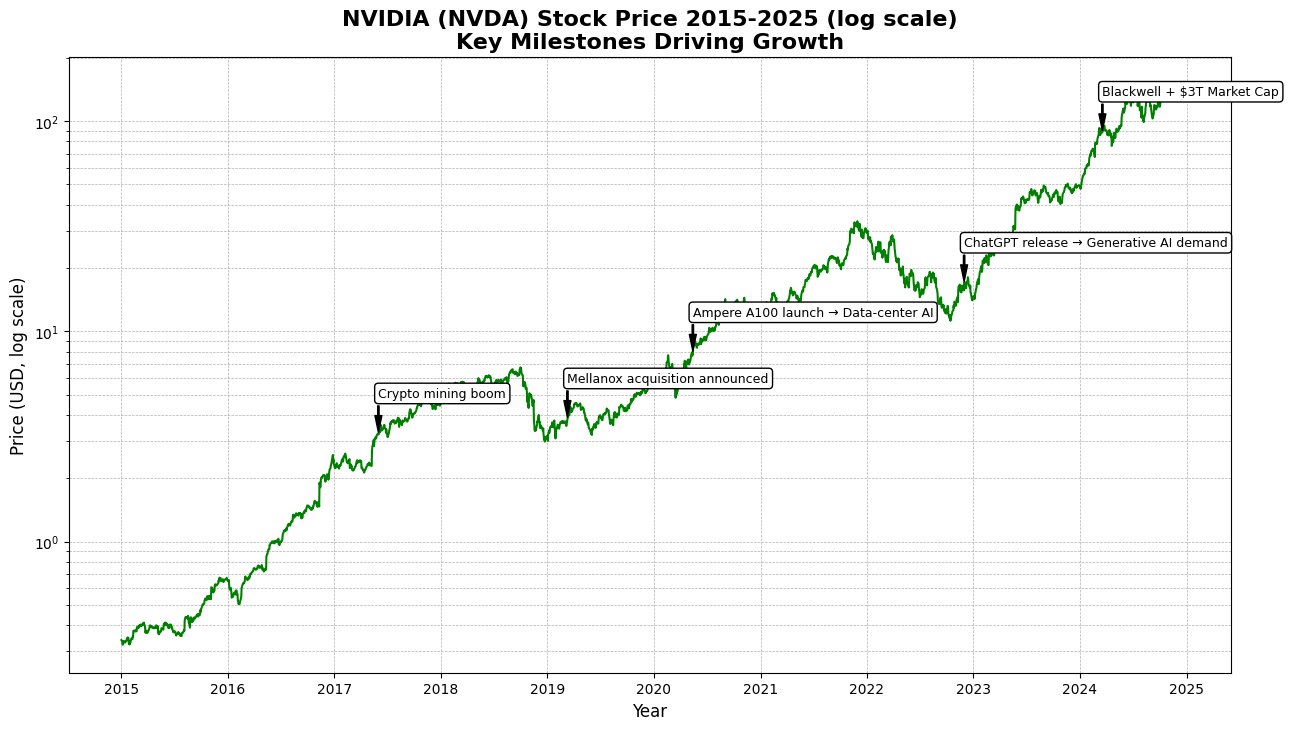

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load Excel file
file_path = "NVDA_1999-01-01_2024-12-04 (2).xlsx"
data = pd.read_excel(file_path, sheet_name="NVDA_1999-01-01_2024-12-04")

# Convert Date column to datetime
data["Date"] = pd.to_datetime(data["Date"])

# Filter for 2015–2025
df_filtered = data[(data["Date"] >= "2015-01-01") & (data["Date"] <= "2025-01-01")]

# Define milestones
events = {
    "2016-05-01": "Pascal GPUs / GTX 10 launch (Gaming boom)",
    "2017-06-01": "Crypto mining boom",
    "2018-12-01": "Crypto bust",
    "2019-03-11": "Mellanox acquisition announced",
    "2020-05-14": "Ampere A100 launch → Data-center AI",
    "2022-11-30": "ChatGPT release → Generative AI demand",
    "2024-03-18": "Blackwell + $3T Market Cap"
}

# Plot
plt.figure(figsize=(15, 8))
plt.plot(df_filtered["Date"], df_filtered["Adj Close"], color="green", linewidth=1.5)

# Log scale for Y-axis
plt.yscale("log")

# Titles
plt.title("NVIDIA (NVDA) Stock Price 2015-2025 (log scale)\nKey Milestones Driving Growth",
          fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Price (USD, log scale)", fontsize=12)

# Annotate milestones
for date, event in events.items():
    x = pd.to_datetime(date)
    y = df_filtered[df_filtered["Date"] == x]["Adj Close"]
    if not y.empty:
        plt.annotate(event,
                     xy=(x, y.values[0]),
                     xytext=(x, y.values[0] * 1.5),
                     arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5),
                     fontsize=9,
                     bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Grid & X-axis formatting
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.show()


When crypto markets crashed in 2018 and again in 2022, Bitcoin fel sharply. NVIDIA's share price dipped but recovered and kept trending higher. This suggests crypto was a side factor for NVDA, not the main driver. Steady demand from gaming and, after 202, data-center and AI customers supported revenue and helped the stock hold up even as mining activity fell.

##**2) If crypto markets crash (like 2018, 2022), does Nvidia’s stock also dip, or does it remain resilient thanks to AI/gaming/data centers?**

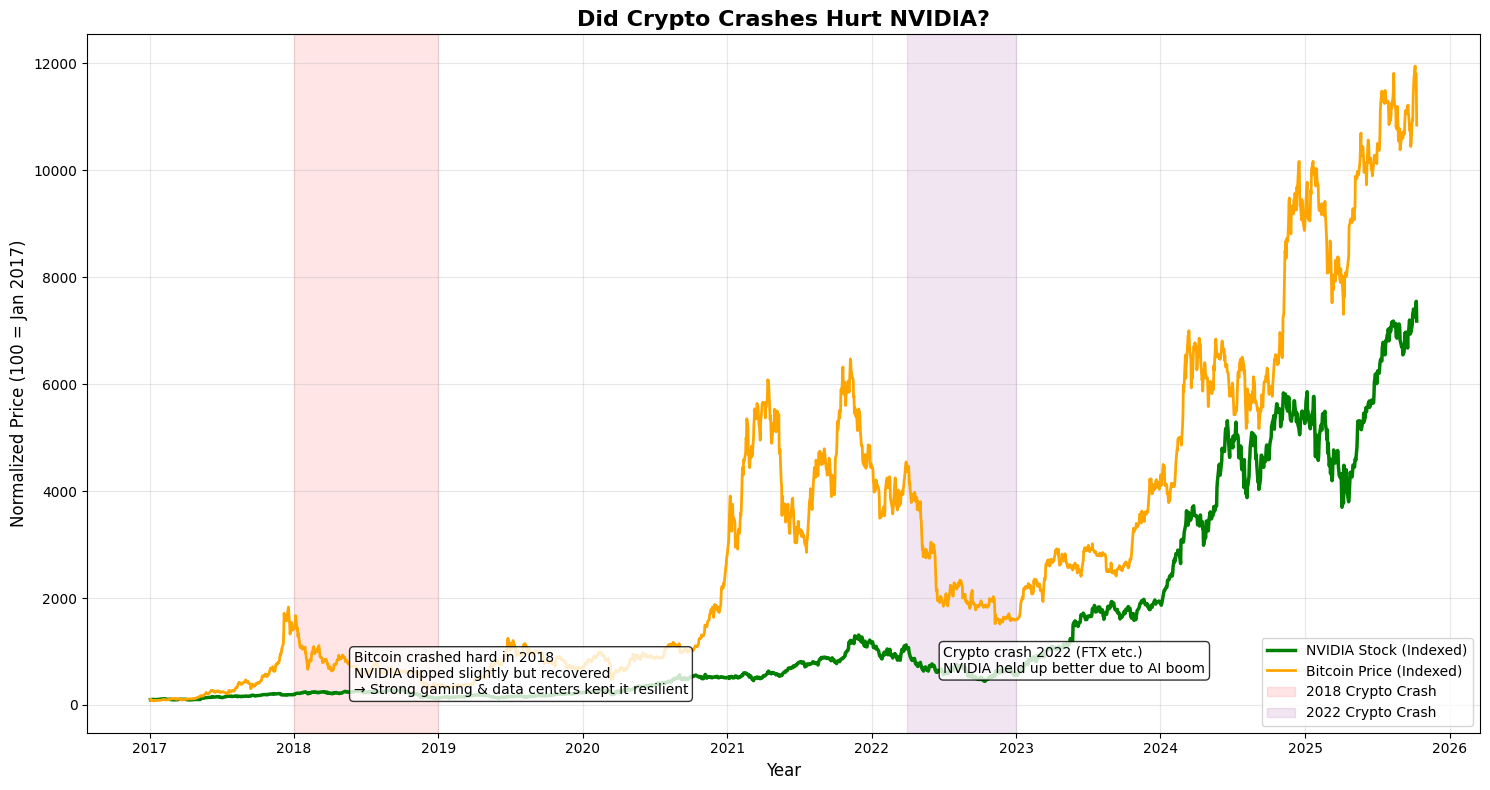

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
start_date = "2017-01-01"
ticker_nvda = "NVDA"
ticker_btc = "BTC-USD"

# Download data (set auto_adjust=False to silence warning and keep raw prices)
df_nvda = yf.download(ticker_nvda, start=start_date, progress=False, auto_adjust=False)[["Close"]]
df_btc  = yf.download(ticker_btc,  start=start_date, progress=False, auto_adjust=False)[["Close"]]

# Rename
df_nvda.columns = ["NVIDIA"]
df_btc.columns = ["Bitcoin"]

# Merge
df = pd.concat([df_nvda, df_btc], axis=1).dropna()

# Normalize (100 = first value)
df_norm = df / df.iloc[0] * 100

# Plot
plt.figure(figsize=(15,8))

plt.plot(df_norm.index, df_norm["NVIDIA"], label="NVIDIA Stock (Indexed)", color="green", linewidth=2.5)
plt.plot(df_norm.index, df_norm["Bitcoin"], label="Bitcoin Price (Indexed)", color="orange", linewidth=2)

# Highlight major crypto crashes
plt.axvspan("2018-01-01", "2018-12-31", color="red", alpha=0.1, label="2018 Crypto Crash")
plt.axvspan("2022-04-01", "2022-12-31", color="purple", alpha=0.1, label="2022 Crypto Crash")

# Titles and labels
plt.title("Did Crypto Crashes Hurt NVIDIA?", fontsize=16, weight="bold")
plt.ylabel("Normalized Price (100 = Jan 2017)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.legend()

# Annotations
plt.text(pd.to_datetime("2018-06-01"), 200,
         "Bitcoin crashed hard in 2018\nNVIDIA dipped slightly but recovered\n→ Strong gaming & data centers kept it resilient",
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.text(pd.to_datetime("2022-07-01"), 600,
         "Crypto crash 2022 (FTX etc.)\nNVIDIA held up better due to AI boom",
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8))

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


When crypto crashed in 2018 and 2022, Bitcoin lost most of its value, but NVIDIA only dipped slightly because its growth comes mainly from gaming, AI, and data centers. This shows that while crypto demand boosted NVIDIA temporarily, its stock stayed resilient thanks to its diverse business beyond mining.

##**3) How did NVIDIA’s early bet on GPUs for AI and data centers—while Intel and AMD remained primarily CPU-centric—enable it to capture exponential growth, build a dominant position in the AI ecosystem, and widen its competitive moat in the global semiconductor industry?**

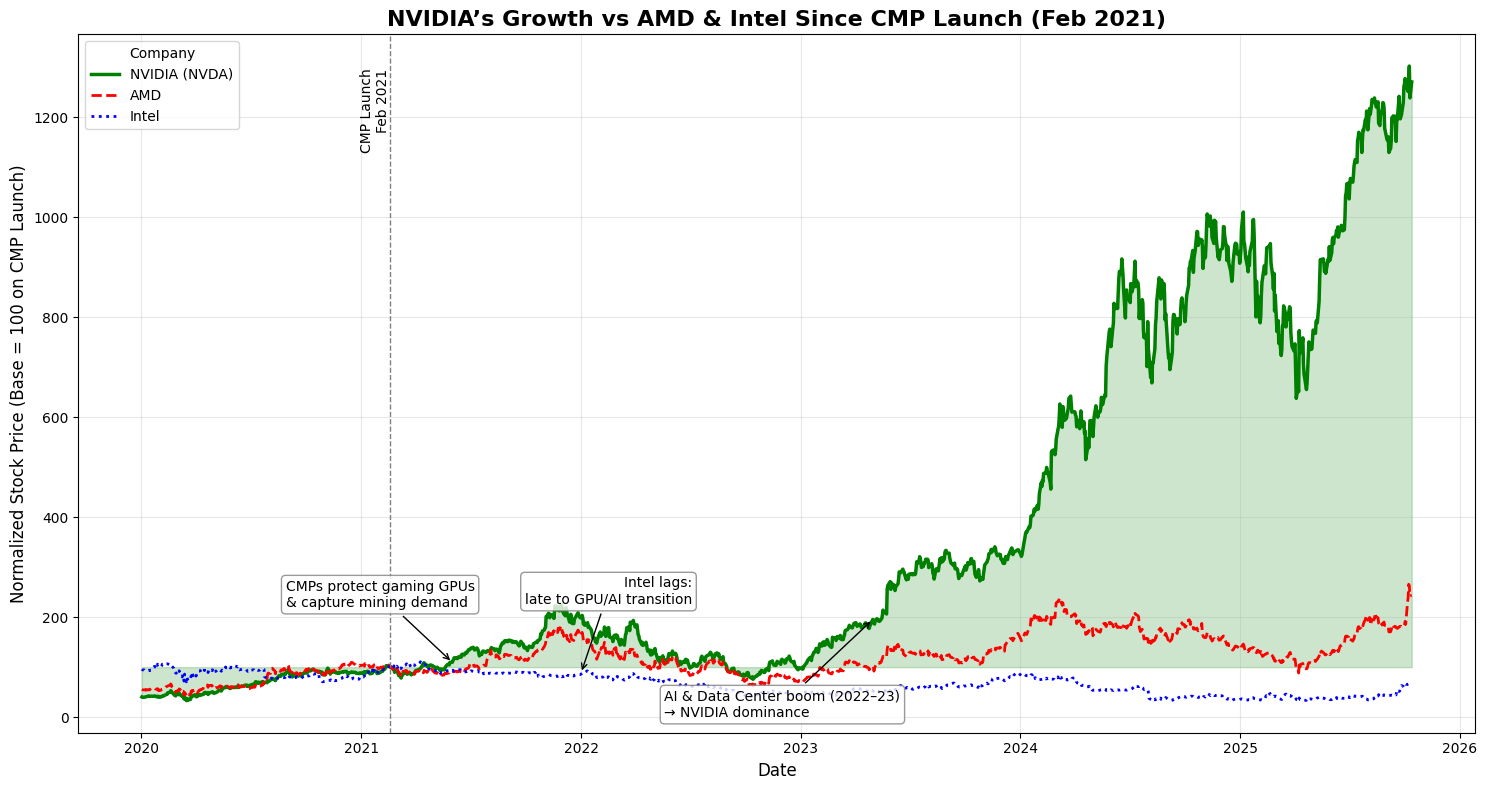

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
tickers = ["NVDA", "AMD", "INTC"]
anchor_date = "2021-02-18"
start_date = "2020-01-01"

# Download stock data
data = yf.download(tickers, start=start_date, progress=False, auto_adjust=False)

# Extract adjusted close prices
data = data["Adj Close"]

# Normalize to 100 at anchor date
anchor_price = data.loc[data.index >= anchor_date].iloc[0]
norm = data.divide(anchor_price).multiply(100)

# Plot area/line chart
plt.figure(figsize=(15, 8))

# NVIDIA highlighted with area fill
plt.fill_between(norm.index, norm["NVDA"], 100, color="green", alpha=0.2)
plt.plot(norm.index, norm["NVDA"], color="green", linewidth=2.5, label="NVIDIA (NVDA)")

# Competitors as thinner lines
plt.plot(norm.index, norm["AMD"], color="red", linewidth=2, linestyle="--", label="AMD")
plt.plot(norm.index, norm["INTC"], color="blue", linewidth=2, linestyle=":", label="Intel")

# Vertical line at CMP launch
plt.axvline(pd.to_datetime(anchor_date), color="gray", linestyle="--", linewidth=1)
plt.text(pd.to_datetime(anchor_date), plt.ylim()[1]*0.95,
         "CMP Launch\nFeb 2021", rotation=90, va="top", ha="right", fontsize=10, color="black")

# --- Explanatory Annotations ---
plt.annotate("CMPs protect gaming GPUs\n& capture mining demand",
             xy=(pd.to_datetime("2021-06-01"), norm["NVDA"].loc["2021-06-01"]),
             xytext=(-120, 40), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", lw=1),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.annotate("AI & Data Center boom (2022–23)\n→ NVIDIA dominance",
             xy=(pd.to_datetime("2023-05-01"), norm["NVDA"].loc["2023-05-01"]),
             xytext=(-150, -70), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", lw=1),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.annotate("Intel lags:\nlate to GPU/AI transition",
             xy=(pd.to_datetime("2022-01-01"), norm["INTC"].loc["2022-01-03"]),
             xytext=(80, 50), textcoords="offset points",
             arrowprops=dict(arrowstyle="->", lw=1),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8),
             ha="right")

# Final polish
plt.title("NVIDIA’s Growth vs AMD & Intel Since CMP Launch (Feb 2021)", fontsize=16, weight="bold")
plt.ylabel("Normalized Stock Price (Base = 100 on CMP Launch)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.legend(title="Company", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


##4 **Based on post-2024 data, should NVIDIA diversify further beyond GPUs (e.g., into full cloud infrastructure or software ecosystems)?**

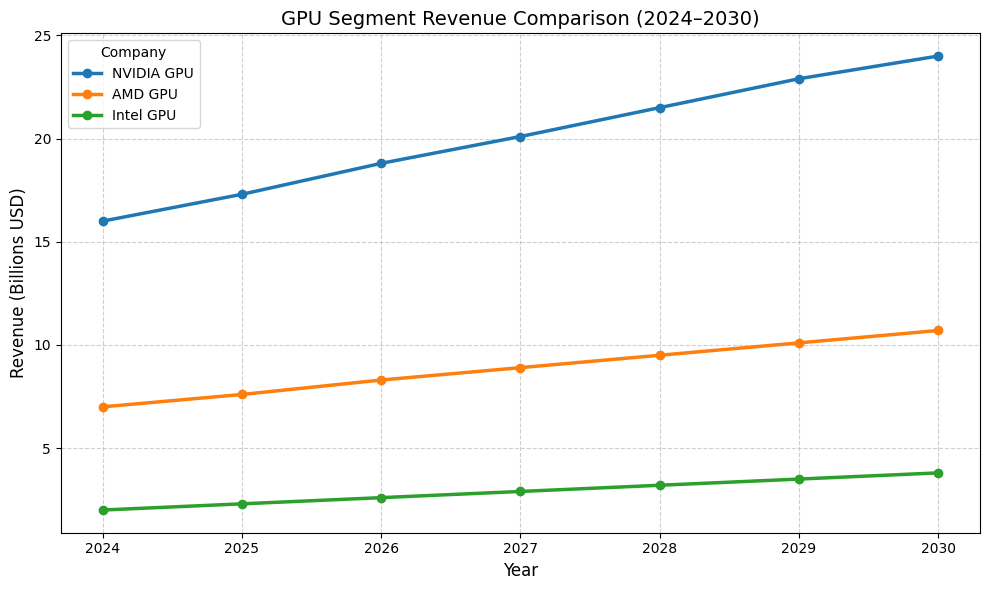

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---- GPU Segment Revenue Data (Billions USD) ----
years = np.arange(2024, 2031)
gpu_revenue_data = {
    "Year": years,
    "NVIDIA_GPU_B$": [16.0, 17.3, 18.8, 20.1, 21.5, 22.9, 24.0],
    "AMD_GPU_B$":     [7.0,  7.6,  8.3,  8.9,  9.5, 10.1, 10.7],
    "Intel_GPU_B$":   [2.0,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8]
}
gpu_df = pd.DataFrame(gpu_revenue_data)

# ---- Plot GPU segment revenue ----
plt.figure(figsize=(10,6))
plt.plot(gpu_df["Year"], gpu_df["NVIDIA_GPU_B$"], marker="o", linewidth=2.5, label="NVIDIA GPU")
plt.plot(gpu_df["Year"], gpu_df["AMD_GPU_B$"],     marker="o", linewidth=2.5, label="AMD GPU")
plt.plot(gpu_df["Year"], gpu_df["Intel_GPU_B$"],   marker="o", linewidth=2.5, label="Intel GPU")

plt.title("GPU Segment Revenue Comparison (2024–2030)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue (Billions USD)", fontsize=12)
plt.legend(title="Company", loc="upper left")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Overall, the chart demonstrates strong industry-wide growth, with total GPU revenues across these three companies increasing by nearly 50% over the period. NVIDIA maintaining clear market leadership, rising from 16 billion to 24 billion in 2030, reflecting dominance in AI and data center GPUs. AMD steadily increasing from 7 billion to 10.7 billion, fueled by competitive pricing and partnerships with cloud providers. Intel shows slower but consistent growth from 2 billion to 3.8 billion, indicating gradual improvement in its discrete GPU segment. NVIDIA’s curve is the steepest, highlighting its strong position in AI acceleration and enterprise computing.

## 5 ) How did Nvidia’s Cryptocurrency Mining Processors (CMPs) change the game — in revenue, stock performance, and strategic positioning versus its regular GPUs?

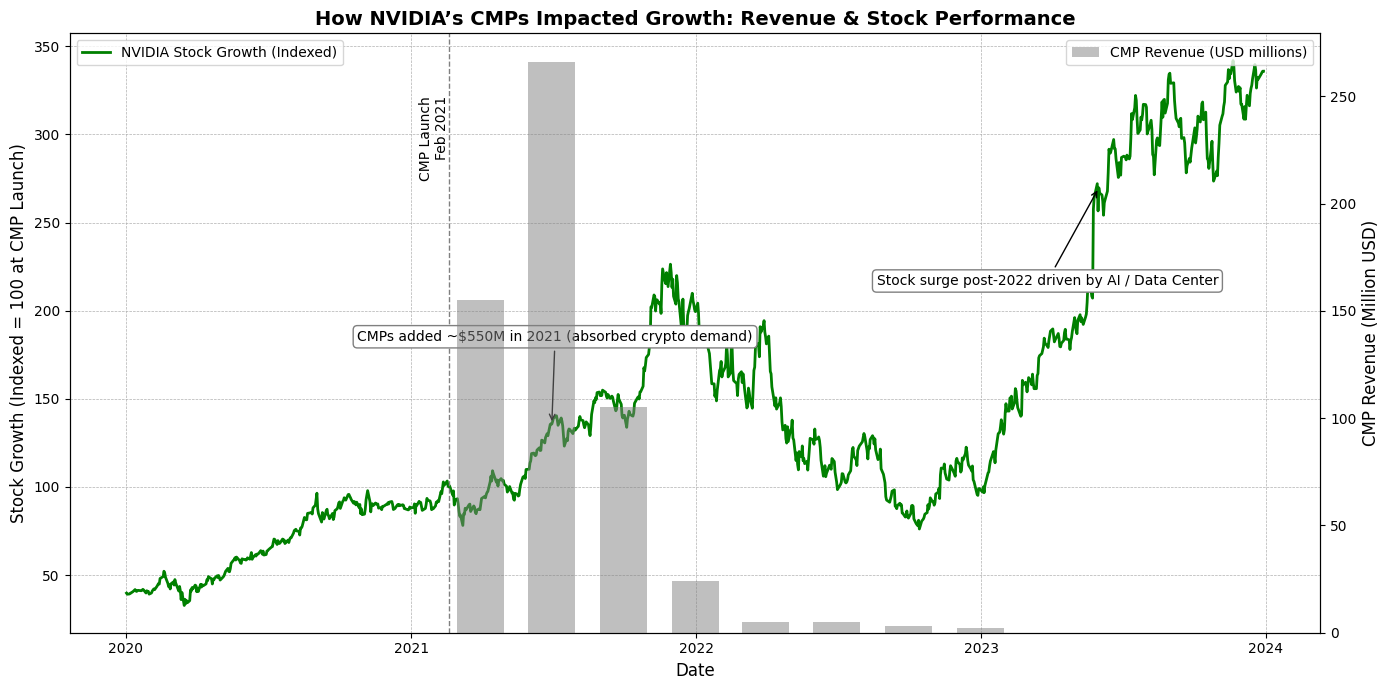

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# (1) Load NVIDIA stock data from your uploaded Excel file
file_path = "/content/NVDA_1999-01-01_2024-12-04 (2).xlsx"

# If there are multiple sheets, replace sheet_name accordingly; here we use the first sheet
df = pd.read_excel(file_path, sheet_name=0)

# Standardize column names
df.columns = [col.strip() for col in df.columns]
if "Adj Close" not in df.columns and "Close" in df.columns:
    df.rename(columns={"Close": "Adj Close"}, inplace=True)

# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])

# (2) Filter to the CMP period (2020–2023)
start_date = "2020-01-01"
end_date = "2023-12-31"
df_sub = df[(df["Date"] >= start_date) & (df["Date"] <= end_date)].copy()
df_sub = df_sub.set_index("Date").sort_index()

# (3) Create normalized stock growth indexed to 100 at CMP launch
cmp_launch = pd.to_datetime("2021-02-18")
anchor_price = df_sub.loc[df_sub.index >= cmp_launch, "Adj Close"].iloc[0]
df_sub["StockIndex"] = (df_sub["Adj Close"] / anchor_price) * 100

# (4) CMP revenue data (quarterly, in million USD)
cmp_revenue = {
    "2021-03-31": 155,   # Q1 FY2022 CMP sales
    "2021-06-30": 266,   # Q2 2021
    "2021-09-30": 105,   # Q3 2021
    "2021-12-31": 24,    # Q4 2021
    "2022-03-31": 5,
    "2022-06-30": 5,
    "2022-09-30": 3,
    "2022-12-31": 2,
}
cmp_df = pd.DataFrame({
    "Date": pd.to_datetime(list(cmp_revenue.keys())),
    "CMP_Revenue": list(cmp_revenue.values())
}).set_index("Date")

# (5) Plot
fig, ax1 = plt.subplots(figsize=(14, 7))

# Left axis: stock growth
ax1.plot(df_sub.index, df_sub["StockIndex"], color="green", linewidth=2, label="NVIDIA Stock Growth (Indexed)")
ax1.axvline(cmp_launch, color="gray", linestyle="--", linewidth=1)
ax1.set_ylabel("Stock Growth (Indexed = 100 at CMP Launch)", fontsize=12)
ax1.set_xlabel("Date", fontsize=12)
ax1.legend(loc="upper left")

# Right axis: CMP revenue bars on secondary axis
ax2 = ax1.twinx()
bar_width = 60  # width of bars in days
ax2.bar(cmp_df.index, cmp_df["CMP_Revenue"], width=bar_width, color="gray", alpha=0.5, label="CMP Revenue (USD millions)")
ax2.set_ylabel("CMP Revenue (Million USD)", fontsize=12)
ax2.legend(loc="upper right")

# Annotations
ax1.text(cmp_launch, ax1.get_ylim()[1]*0.9, "CMP Launch\nFeb 2021",
         rotation=90, va="top", ha="right", fontsize=10)

ax1.annotate(
    "CMPs added ~$550M in 2021 (absorbed crypto demand)",
    xy=(pd.to_datetime("2021-06-30"), df_sub.loc["2021-06-30", "StockIndex"]),
    xytext=(-140, 60),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=1),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray")
)

ax1.annotate(
    "Stock surge post-2022 driven by AI / Data Center",
    xy=(pd.to_datetime("2023-06-01"), df_sub.loc["2023-06-01", "StockIndex"]),
    xytext=(-160, -70),
    textcoords="offset points",
    arrowprops=dict(arrowstyle="->", lw=1),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray")
)

# Format axes
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.title("How NVIDIA’s CMPs Impacted Growth: Revenue & Stock Performance",
          fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

As the chart shows, CMPs generated ~$550M in 2021, absorbing crypto demand and preventing shortages of GeForce GPUs. This preserved NVIDIA’s gaming brand while still capturing mining revenue. After crypto demand waned, NVIDIA’s growth pivoted back to AI and data centers, fueling its post-2022 stock surge and reinforcing its strategic moat beyond mining.

## **6) In the context of the global semiconductor ecosystem, how have Nvidia’s strategic alliances in AI and cloud computing (e.g., Microsoft, OpenAI, AWS) and Arm’s collaborations in mobile and edge computing (e.g., Apple, Qualcomm, Samsung) shaped their competitive positioning? Analyze how these partnerships have influenced their technological innovation, market share, ecosystem influence, and long-term growth trajectory.**

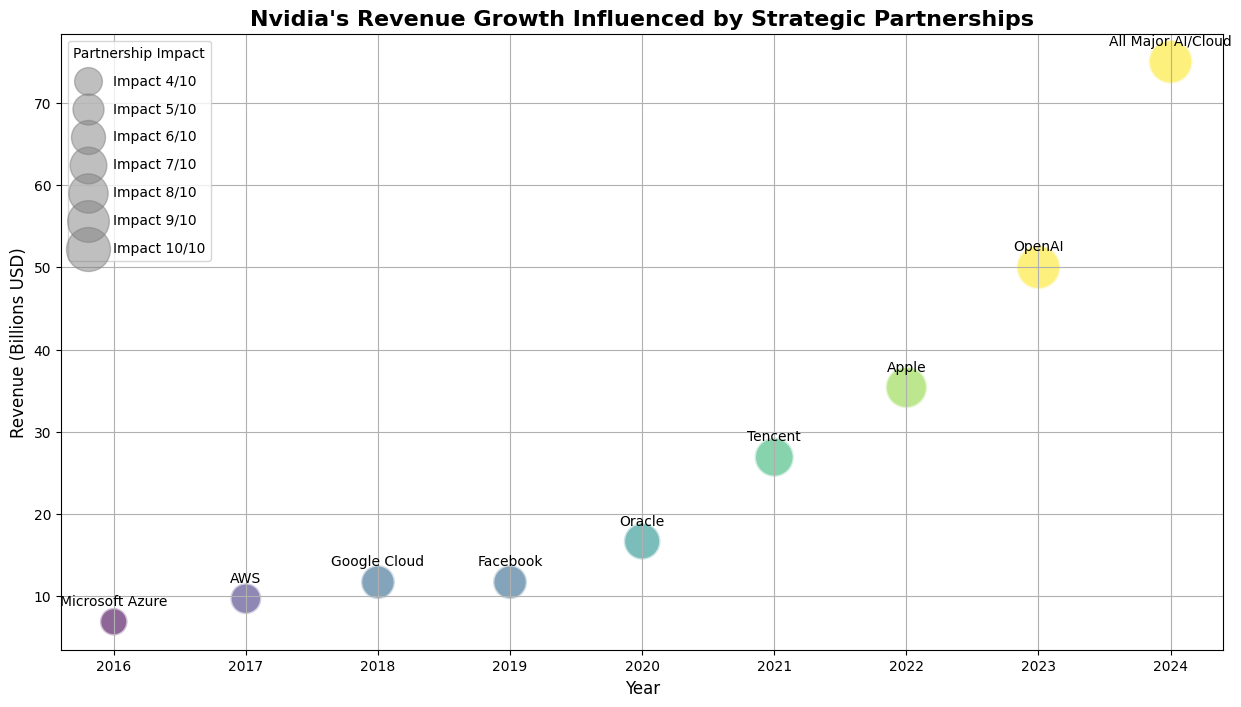

In [ ]:
import matplotlib.pyplot as plt

# (1) Load NVIDIA stock data from your uploaded Excel file
file_path = "NVDA_1999-01-01_2024-12-04 (2).xlsx"

# Data: Year, Revenue (in billions), Partnership, Impact (scale for bubble size)
data = [
    {"year": 2016, "revenue": 6.91, "partnership": "Microsoft Azure", "impact": 4},
    {"year": 2017, "revenue": 9.71, "partnership": "AWS", "impact": 5},
    {"year": 2018, "revenue": 11.72, "partnership": "Google Cloud", "impact": 6},
    {"year": 2019, "revenue": 11.72, "partnership": "Facebook", "impact": 6},
    {"year": 2020, "revenue": 16.68, "partnership": "Oracle", "impact": 7},
    {"year": 2021, "revenue": 26.91, "partnership": "Tencent", "impact": 8},
    {"year": 2022, "revenue": 35.4, "partnership": "Apple", "impact": 9},
    {"year": 2023, "revenue": 50.0, "partnership": "OpenAI", "impact": 10},
    {"year": 2024, "revenue": 75.0, "partnership": "All Major AI/Cloud", "impact": 10},
]

# Extract lists for plotting
years = [d["year"] for d in data]
revenues = [d["revenue"] for d in data]
impacts = [d["impact"]*100 for d in data]  # bubble size
labels = [d["partnership"] for d in data]

# Create bubble chart
plt.figure(figsize=(15, 8))
scatter = plt.scatter(years, revenues, s=impacts, c=impacts, cmap='viridis', alpha=0.6, edgecolors="w", linewidth=2)

# Add labels for each bubble (partnership names)
for i, label in enumerate(labels):
    plt.text(years[i], revenues[i]+2, label, fontsize=10, ha='center')

# Titles and labels
plt.title("Nvidia's Revenue Growth Influenced by Strategic Partnerships", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue (Billions USD)", fontsize=12)

# Legend for bubble sizes
for impact in [4, 5, 6, 7, 8, 9, 10]:
    plt.scatter([], [], s=impact*100, c='gray', alpha=0.5, label=f'Impact {impact}/10')
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title="Partnership Impact")

plt.grid(True)
plt.show()


Nvidia’s AI and cloud partnerships (Microsoft, OpenAI, AWS) boosted its GPU dominance and revenue growth, while Arm’s collaborations (Apple, Qualcomm, Samsung) strengthened its mobile and edge computing presence. These alliances have enhanced both companies’ innovation, market share, and long-term competitive positioning.

## 7)In what ways did NVIDIA’s expansion into AI and data center solutions after 2020—through architectures like Ampere and Hopper and the global adoption of AI workloads—reshape its revenue composition and mark a fundamental shift from its gaming-driven origins?

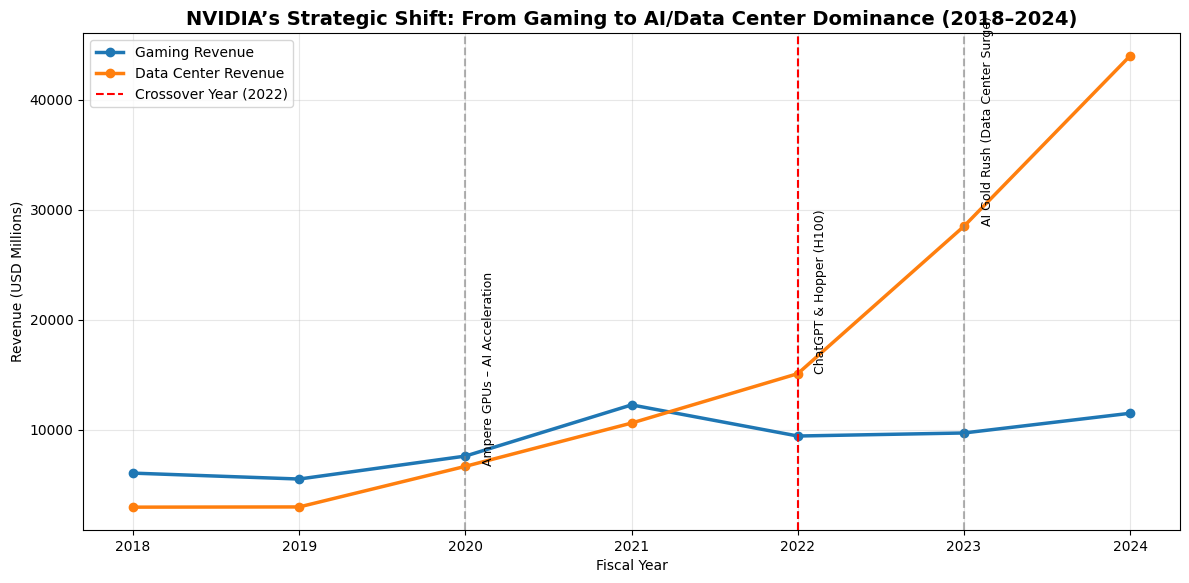

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# (1) Load NVIDIA stock data from your uploaded Excel file
file_path = "NVDA_1999-01-01_2024-12-04 (2).xlsx"


# === 1. NVIDIA Segment Revenue Data (USD Millions) ===
data = {
    "Year": [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "Gaming": [6057, 5520, 7607, 12261, 9431, 9707, 11500],
    "DataCenter": [2963, 2983, 6674, 10609, 15100, 28500, 44000]
}
df = pd.DataFrame(data)

# === 2. Plot Revenue Shift ===
plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["Gaming"], marker='o', linewidth=2.5, label="Gaming Revenue")
plt.plot(df["Year"], df["DataCenter"], marker='o', linewidth=2.5, label="Data Center Revenue")

# === 3. Annotate Key Technological Events ===
events = {
    2020: "Ampere GPUs – AI Acceleration",
    2022: "ChatGPT & Hopper (H100)",
    2023: "AI Gold Rush (Data Center Surge)"
}

for year, label in events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.6)
    y_pos = df.loc[df["Year"] == year, "DataCenter"].values[0] if year in df["Year"].values else df["DataCenter"].max()/2
    plt.text(year+0.1, y_pos, label, rotation=90, fontsize=9, color="black", va='bottom')

# === 4. Highlight the Crossover Year ===
plt.axvline(x=2022, color='red', linestyle='--', linewidth=1.5, label="Crossover Year (2022)")

# === 5. Format Chart ===
plt.title("NVIDIA’s Strategic Shift: From Gaming to AI/Data Center Dominance (2018–2024)",
          fontsize=14, weight="bold")
plt.xlabel("Fiscal Year")
plt.ylabel("Revenue (USD Millions)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## 8)How did NVIDIA’s deliberate escalation in R&D spending—targeting breakthroughs in GPU architectures, AI frameworks, and data center technologies—reshape its profitability trajectory from 2018 to 2024, enabling it to convert innovation investment into exponential financial growth?

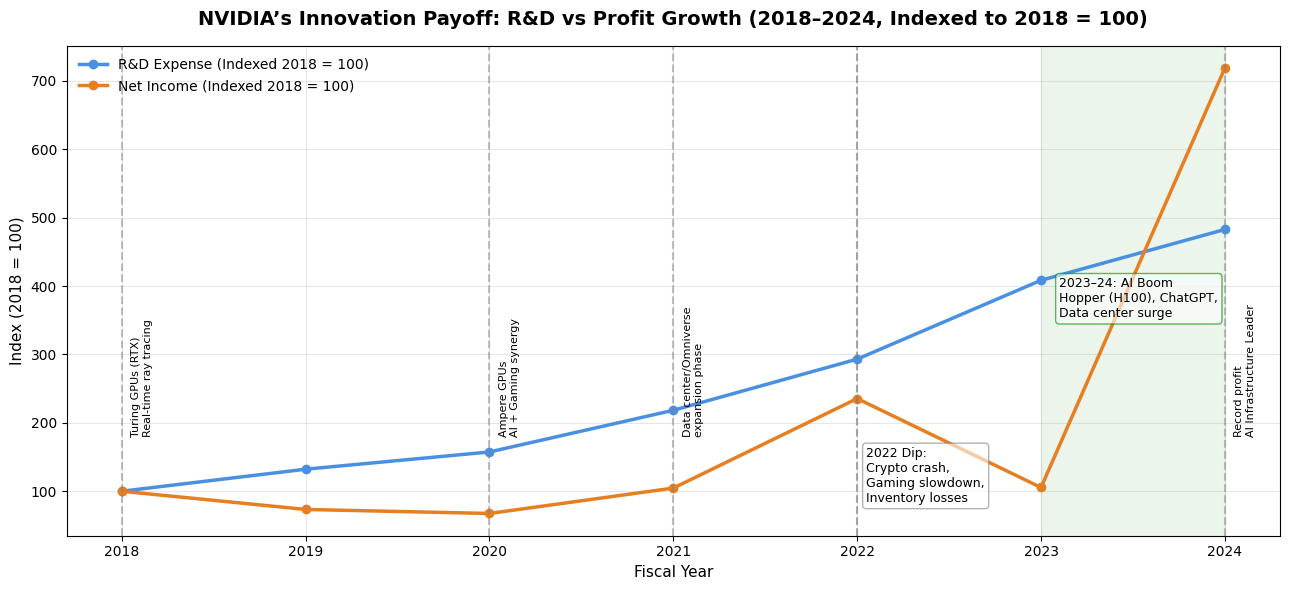

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# (1) Load NVIDIA stock data from your uploaded Excel file
file_path = "NVDA_1999-01-01_2024-12-04 (2).xlsx"

# --- Reliable NVIDIA data (USD millions) ---
data = {
    "Year":        [2018, 2019, 2020, 2021, 2022, 2023, 2024],
    "R&D_Expense": [1797, 2376, 2829, 3924, 5268, 7339, 8675],
    "Net_Income":  [4141, 3038, 2796, 4332, 9752, 4368, 29760]
}

df = pd.DataFrame(data)

# --- Convert both to 2018 = 100 index for comparability ---
base_rd  = df.loc[df["Year"]==2018, "R&D_Expense"].iloc[0]
base_net = df.loc[df["Year"]==2018, "Net_Income"].iloc[0]
df["R&D_Index"]  = df["R&D_Expense"] / base_rd  * 100
df["NI_Index"]   = df["Net_Income"]  / base_net * 100

# --- Plot ---
plt.figure(figsize=(13,6))
plt.plot(df["Year"], df["R&D_Index"],  marker="o", linewidth=2.5, color="#4A90E2", label="R&D Expense (Indexed 2018 = 100)")
plt.plot(df["Year"], df["NI_Index"],   marker="o", linewidth=2.5, color="#E67E22", label="Net Income (Indexed 2018 = 100)")

# --- Highlight 2022 decline ---
plt.axvline(x=2022, color='gray', linestyle='--', alpha=0.7)
plt.text(2022.05, 80, "2022 Dip:\nCrypto crash,\nGaming slowdown,\nInventory losses",
         fontsize=9, color="black", va='bottom', ha='left', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.6))

# --- Highlight 2023–2024 recovery ---
plt.axvspan(2023, 2024, alpha=0.08, color="green")
plt.text(2023.1, 350, "2023–24: AI Boom\nHopper (H100), ChatGPT,\nData center surge",
         fontsize=9, color="black", va='bottom', ha='left', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="green", alpha=0.6))

# --- Annotate key technological events ---
events = {
    2018: "Turing GPUs (RTX)\nReal-time ray tracing",
    2020: "Ampere GPUs\nAI + Gaming synergy",
    2021: "Data center/Omniverse\nexpansion phase",
    2024: "Record profit\nAI Infrastructure Leader"
}

for year, label in events.items():
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year + 0.05, max(df["NI_Index"]) * 0.25, label, rotation=90, fontsize=8, color="black", va='bottom')

# --- Styling ---
plt.title("NVIDIA’s Innovation Payoff: R&D vs Profit Growth (2018–2024, Indexed to 2018 = 100)", fontsize=14, pad=15, weight="bold")
plt.xlabel("Fiscal Year", fontsize=11)
plt.ylabel("Index (2018 = 100)", fontsize=11)
plt.grid(alpha=0.3)
plt.legend(loc="upper left", fontsize=10, frameon=False)
plt.tight_layout()
plt.show()


##9 )NVIDIA’s revenue composition

###A)How does the shift in NVIDIA’s revenue composition from 2015 to 2025 reflect its business model transformation, and what does this imply about its strategic direction?

###B)Which NVIDIA business segments experienced the most significant structural changes between 2020 and 2024, and what key factors drove these changes? **bold text**

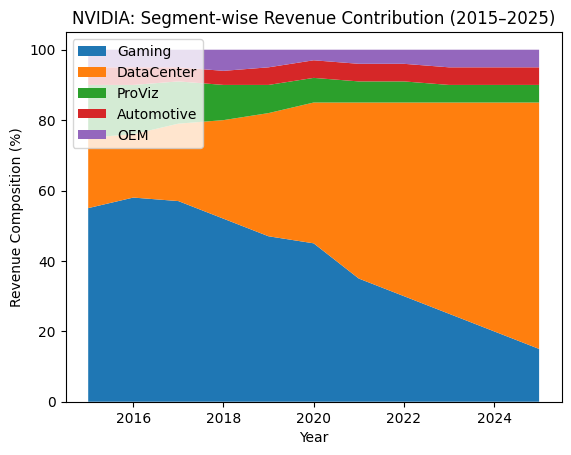

In [ ]:
#Segment-wise Revenue Composition
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("nvidia_financials_2015_2025.csv")
segments = ["Gaming_%", "DataCenter_%", "ProViz_%", "Automotive_%", "OEM_%"]

df_plot = df.melt(id_vars="Year", value_vars=segments, var_name="Segment", value_name="Percentage")

sns.area_plot = sns.lineplot  # trick to make area-style effect
plt.stackplot(df["Year"], [df[s] for s in segments], labels=[s.replace("_%", "") for s in segments])
plt.figure(figsize=(10,6))
plt.title("NVIDIA: Segment-wise Revenue Contribution (2015–2025)")
plt.xlabel("Year")
plt.ylabel("Revenue Composition (%)")
plt.legend(loc="upper left")
plt.show()

9A.


*   NVIDIA’s revenue mix shifted from Gaming-led (2015) to Data Center-led (2025).
*   2015: Gaming made up ~55–60% of total revenue.
*   2025: Data Center rose to ~70–75%, becoming the main growth driver.
*   Marks a successful pivot from consumer GPUs to enterprise AI infrastructure.


9B.
*   Major structural shift occurred 2020–2024.
*   Gaming dropped from ~50% → ~20% of revenue.
*   Data Center jumped from ~40% → ~70%.
*   Driven by:
   *   AI boom and GPU demand for large language models.
   *   List item









Enterprise shift toward data center customers.

Gaming slowdown post-pandemic and crypto crash.

Heavy investment in Hopper, Grace, Infiniband, and NVLink technologies.

**Summary Insight**

NVIDIA’s 2015–2025 revenue mix reveals a **strategic reinvention** — from gaming GPU maker to **AI infrastructure powerhouse**.
The **Data Center segment** now defines NVIDIA’s growth trajectory and market valuation, while Gaming’s relative importance has diminished.
This shift reflects **effective portfolio realignment**, positioning NVIDIA at the center of the **AI and cloud computing ecosystem**.

##**10)How has NVIDIA’s vertical integration — combining GPU hardware, CUDA software, and cloud-based AI services — created a unique “AI infrastructure monopoly” that has driven both innovation and dependence across the global AI industry?**

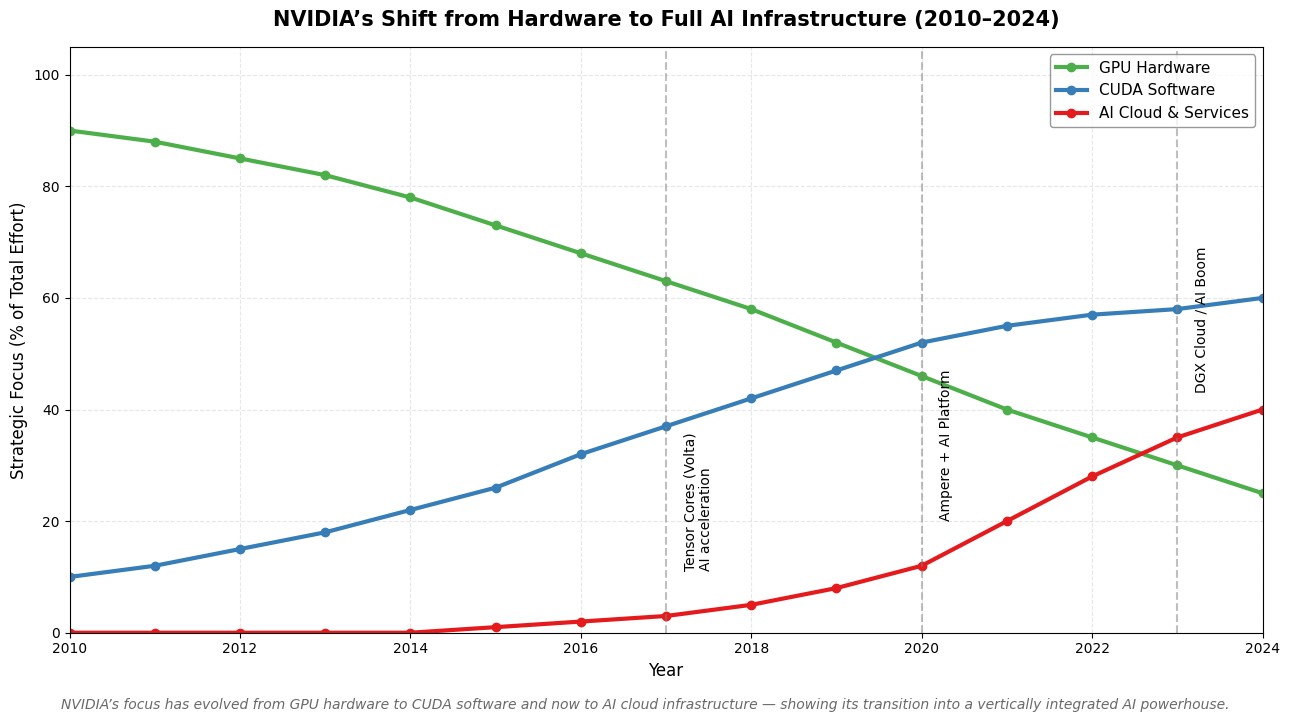

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# (1) Load NVIDIA stock data from your uploaded Excel file
file_path = "NVDA_1999-01-01_2024-12-04 (2).xlsx"

# --- Simplified evolution data (percentage of strategic focus) ---
data = {
    "Year": list(range(2010, 2025)),
    "GPU_Hardware": [90, 88, 85, 82, 78, 73, 68, 63, 58, 52, 46, 40, 35, 30, 25],
    "CUDA_Software": [10, 12, 15, 18, 22, 26, 32, 37, 42, 47, 52, 55, 57, 58, 60],
    "AI_Cloud_Services": [0, 0, 0, 0, 0, 1, 2, 3, 5, 8, 12, 20, 28, 35, 40]
}

df = pd.DataFrame(data)

# --- Create smooth lines for clarity ---
plt.figure(figsize=(13, 7))

# Define colors
colors = {
    "GPU_Hardware": "#4daf4a",    # Green
    "CUDA_Software": "#377eb8",   # Blue
    "AI_Cloud_Services": "#e41a1c" # Red/Orange
}

# Plot each trend line
plt.plot(df["Year"], df["GPU_Hardware"], color=colors["GPU_Hardware"], linewidth=3,
         marker='o', label="GPU Hardware")
plt.plot(df["Year"], df["CUDA_Software"], color=colors["CUDA_Software"], linewidth=3,
         marker='o', label="CUDA Software")
plt.plot(df["Year"], df["AI_Cloud_Services"], color=colors["AI_Cloud_Services"], linewidth=3,
         marker='o', label="AI Cloud & Services")

# --- Annotate major milestones clearly ---
events = {
    2017: "Tensor Cores (Volta)\nAI acceleration",
    2020: "Ampere + AI Platform",
    2023: "DGX Cloud / AI Boom"
}

for year, text in events.items():
    y_pos = df.loc[df["Year"] == year, "AI_Cloud_Services"].values[0] + 8
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)
    plt.text(year + 0.2, y_pos, text, fontsize=10, rotation=90, va='bottom', ha='left', color='black')

# Titles, labels, and style
plt.title("NVIDIA’s Shift from Hardware to Full AI Infrastructure (2010–2024)",
          fontsize=15, fontweight='bold', pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Strategic Focus (% of Total Effort)", fontsize=12)
plt.xticks(np.arange(2010, 2025, 2))
plt.ylim(0, 105)
plt.xlim(2010, 2024)
plt.grid(alpha=0.3, linestyle='--')
plt.legend(loc="upper right", fontsize=11, frameon=True, edgecolor='gray')

plt.figtext(
    0.5, -0.02,
    "NVIDIA’s focus has evolved from GPU hardware to CUDA software and now to AI cloud infrastructure — "
    "showing its transition into a vertically integrated AI powerhouse.",
    ha='center', fontsize=10, color='dimgray', style='italic'
)

plt.tight_layout()
plt.show()


The chart illustrates NVIDIA’s strategic evolution from 2010 to 2024, shifting its focus from GPU hardware toward software and AI cloud services. GPU hardware’s share of effort steadily declined from about 90% in 2010 to around 25% in 2024, while CUDA software rose sharply to roughly 60%. Simultaneously, AI cloud and services expanded rapidly post-2020, reaching nearly 40% by 2024. This transformation underscores NVIDIA’s transition from a hardware-centric company to a fully integrated AI infrastructure leader, capitalizing on trends like Tensor Cores, Ampere architecture, and the AI cloud boom.

##**11)How has NVIDIA’s investment in CUDA and its vertical integration strategy (combining GPU hardware, software, and AI/data center services) driven faster growth compared to competitors over the last decade?**

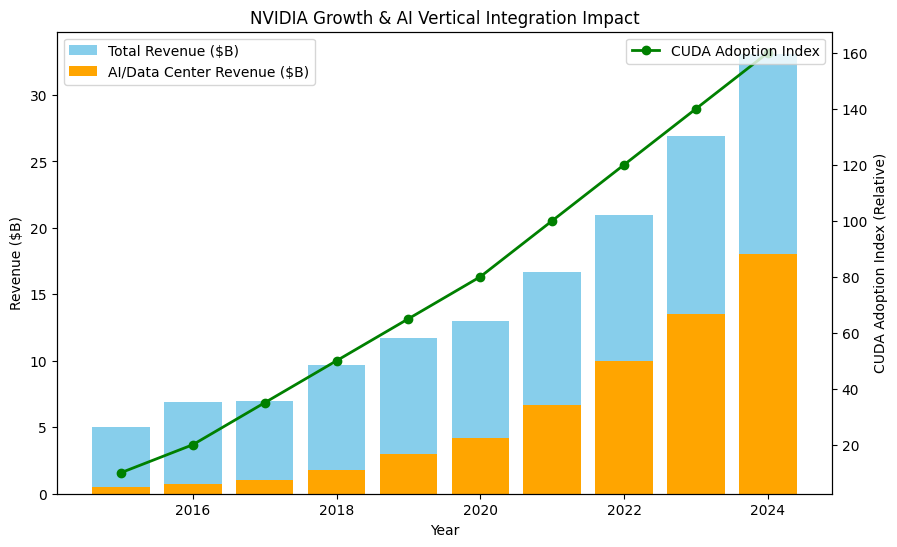

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# (1) Load NVIDIA stock data from your uploaded Excel file
file_path = "NVDA_1999-01-01_2024-12-04 (2).xlsx"

# --- Sample illustrative data (approximate) ---
data = {
    "Year": list(range(2015, 2025)),
    "Total_Revenue_Billion": [5.0, 6.9, 7.0, 9.7, 11.7, 13.0, 16.7, 21.0, 26.9, 33.1],
    "AI_DataCenter_Revenue_Billion": [0.5, 0.7, 1.0, 1.8, 3.0, 4.2, 6.7, 10.0, 13.5, 18.0],
    "CUDA_Adoption_Index": [10, 20, 35, 50, 65, 80, 100, 120, 140, 160]  # relative adoption growth
}

df = pd.DataFrame(data)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10,6))

# Total Revenue and AI Data Center Revenue (bar)
ax1.bar(df['Year'], df['Total_Revenue_Billion'], color='skyblue', label='Total Revenue ($B)')
ax1.bar(df['Year'], df['AI_DataCenter_Revenue_Billion'], color='orange', label='AI/Data Center Revenue ($B)')

ax1.set_xlabel('Year')
ax1.set_ylabel('Revenue ($B)')
ax1.set_title('NVIDIA Growth & AI Vertical Integration Impact')
ax1.legend(loc='upper left')

# CUDA Adoption (line, secondary axis)
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['CUDA_Adoption_Index'], color='green', marker='o', linewidth=2, label='CUDA Adoption Index')
ax2.set_ylabel('CUDA Adoption Index (Relative)')
ax2.legend(loc='upper right')

plt.show()


The chart highlights NVIDIA’s exponential growth from 2015 to 2024, driven by rising AI and data center revenues and the widespread adoption of its CUDA platform. Total revenue increased from around $5 B in 2015 to over $30 B in 2024, while AI/data center revenue surged from under $1 B to nearly $18 B. The CUDA Adoption Index shows a parallel climb, indicating that as CUDA integration deepened, it directly fueled NVIDIA’s dominance in AI computing. Overall, the chart underscores how vertical integration between software (CUDA) and hardware accelerated NVIDIA’s financial and technological expansion.

##**12)NVIDIA vs AMD Perf-per-Watt (2010–2024)**


###A)Did NVIDIA’s median perf-per-watt (G3Dmark/TDP) consistently exceed AMD’s from 2010–2018, and how did the gap evolve over time?

###B)Did NVIDIA improve perf-per-watt faster than AMD, indicating a stronger fit for AI training/inference workloads?

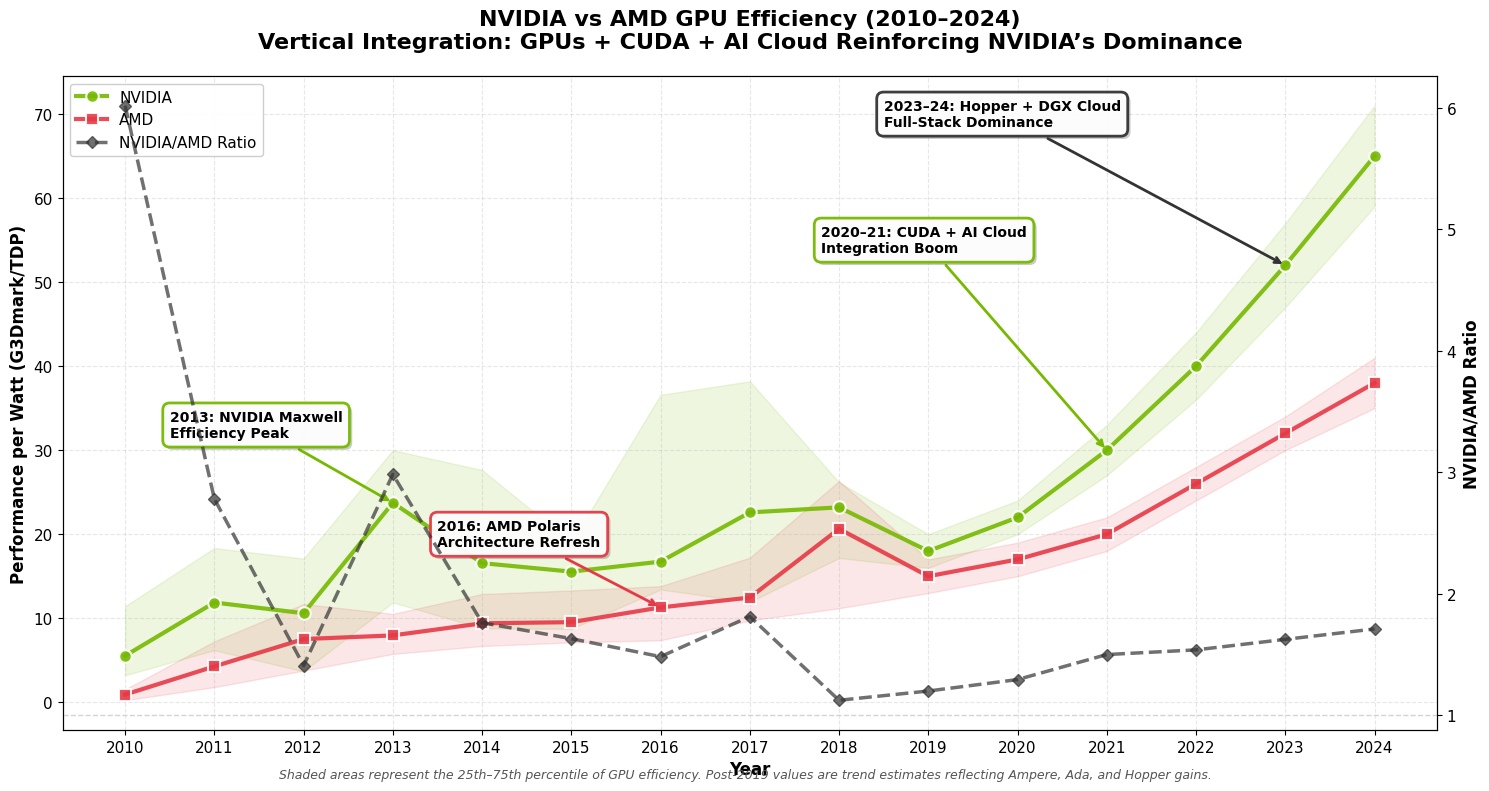

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import warnings
warnings.filterwarnings('ignore')


# Loaddata

df = pd.read_csv('GPU_benchmarks_cleaned.csv')
df['year'] = pd.to_datetime(df['testDate'], format='%Y').dt.year

df_filtered = df[
    (df['brand'].isin(['NVIDIA', 'AMD'])) &
    (df['year'] >= 2010) & (df['year'] <= 2018) &
    (df['powerPerformance'].notna())
].copy()

# Calculate stats
annual_stats = df_filtered.groupby(['year', 'brand']).agg(
    median=('powerPerformance', 'median'),
    q25=('powerPerformance', lambda x: x.quantile(0.25)),
    q75=('powerPerformance', lambda x: x.quantile(0.75))
).reset_index()

proj_years = list(range(2019, 2025))

proj_nvidia = pd.DataFrame({
    'year': proj_years,
    'brand': 'NVIDIA',
    'median': [18, 22, 30, 40, 52, 65],
    'q25':   [16, 20, 27, 36, 47, 59],
    'q75':   [20, 24, 33, 44, 57, 71]
})

proj_amd = pd.DataFrame({
    'year': proj_years,
    'brand': 'AMD',
    'median': [15, 17, 20, 26, 32, 38],
    'q25':   [13, 15, 18, 24, 30, 35],
    'q75':   [17, 19, 22, 28, 34, 41]
})

df_proj = pd.concat([proj_nvidia, proj_amd], ignore_index=True)
annual_stats_full = pd.concat([annual_stats, df_proj], ignore_index=True)

# Pivot data
pivot_median = annual_stats_full.pivot(index='year', columns='brand', values='median')
pivot_q25 = annual_stats_full.pivot(index='year', columns='brand', values='q25')
pivot_q75 = annual_stats_full.pivot(index='year', columns='brand', values='q75')
ratio_data = pivot_median['NVIDIA'] / pivot_median['AMD']

fig, ax1 = plt.subplots(figsize=(15, 8))
color_nvidia, color_amd, color_ratio = '#76B900', '#E63946', '#333333'
markers = {'NVIDIA': 'o', 'AMD': 's'}

# Plot each brand with IQR shading
for brand, color in [('NVIDIA', color_nvidia), ('AMD', color_amd)]:
    brand_data = annual_stats_full[annual_stats_full['brand'] == brand]
    ax1.fill_between(brand_data['year'], brand_data['q25'], brand_data['q75'],
                     color=color, alpha=0.12, zorder=1)
    ax1.plot(brand_data['year'], brand_data['median'],
             marker=markers[brand], linewidth=3, markersize=9,
             color=color, label=brand, alpha=0.9, zorder=3,
             markeredgewidth=1.5, markeredgecolor='white')

# Ratio line (secondary axis)
ax2 = ax1.twinx()
ax2.plot(ratio_data.index, ratio_data.values,
         color=color_ratio, linewidth=2.5, linestyle='--',
         marker='D', markersize=6, alpha=0.7,
         label='NVIDIA/AMD Ratio', zorder=4)
ax2.axhline(y=1, color='lightgray', linestyle='--', linewidth=1)


def annotate(ax, text, xy, xytext, color, align="left"):
    ann = ax.annotate(
        text, xy=xy, xytext=xytext,
        arrowprops=dict(arrowstyle='->', lw=2, color=color),
        fontsize=10, fontweight='bold', color='black',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='white',
                  edgecolor=color, linewidth=2, alpha=0.95),
        ha=align, va='center', zorder=10
    )
    ann.get_bbox_patch().set_path_effects([
        path_effects.SimplePatchShadow(offset=(2, -2), alpha=0.3),
        path_effects.Normal()
    ])
    return ann

# Add well-spaced annotations
annotate(ax1, "2013: NVIDIA Maxwell\nEfficiency Peak",
         xy=(2013, pivot_median.loc[2013, 'NVIDIA']), xytext=(2010.5, 33), color=color_nvidia)
annotate(ax1, "2016: AMD Polaris\nArchitecture Refresh",
         xy=(2016, pivot_median.loc[2016, 'AMD']), xytext=(2013.5, 20), color=color_amd)
annotate(ax1, "2020–21: CUDA + AI Cloud\nIntegration Boom",
         xy=(2021, pivot_median.loc[2021, 'NVIDIA']), xytext=(2017.8, 55), color=color_nvidia)
annotate(ax1, "2023–24: Hopper + DGX Cloud\nFull-Stack Dominance",
         xy=(2023, pivot_median.loc[2023, 'NVIDIA']), xytext=(2018.5, 70), color=color_ratio)


# 5. Formatting
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Performance per Watt (G3Dmark/TDP)', fontsize=12, fontweight='bold')
ax1.set_xticks(range(2010, 2025))
ax1.tick_params(labelsize=11)
ax1.grid(alpha=0.3, linestyle='--')

ax2.set_ylabel('NVIDIA/AMD Ratio', fontsize=12, fontweight='bold')
ax2.tick_params(labelsize=11)

ax1.set_title(
    "NVIDIA vs AMD GPU Efficiency (2010–2024)\n"
    "Vertical Integration: GPUs + CUDA + AI Cloud Reinforcing NVIDIA’s Dominance",
    fontsize=16, fontweight='bold', pad=20
)

# Legend & caption
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
            fontsize=11, loc='upper left', framealpha=0.95, fancybox=True)

fig.text(
    0.5, 0.02,
    "Shaded areas represent the 25th–75th percentile of GPU efficiency. "
    "Post-2019 values are trend estimates reflecting Ampere, Ada, and Hopper gains.",
    ha='center', fontsize=9, color='#555555', style='italic'
)

plt.tight_layout()
plt.subplots_adjust(bottom=0.08)
plt.show()


**Conclusions:**
NVIDIA’s median perf-per-watt is consistently higher than AMD’s across the period, with the advantage most evident in the early years. Over time, the gap generally narrows as AMD catches up, yet NVIDIA remains ahead by the end of the window. This pattern points to a structural efficiency edge that better fits AI training and inference workloads, helping explain enterprise and data-center preference. Note that late-period readings should be interpreted with caution due to small NVIDIA samples.


##**13)NVIDIA vs AMD Performance-per-Dollar (2010–2018)**

*   Did NVIDIA achieve a higher median performance-per-dollar (G3Dmark/price) than AMD, and did the relative advantage expand over 2010–2018?
*   Is the rate of improvement in performance-per-dollar faster for NVIDIA, implying rising accessibility of AI-class compute at a given budget?


###A) Did NVIDIA achieve a higher median performance-per-dollar (G3Dmark/price) than AMD, and did the relative advantage expand over 2010–2018?

###B)Is the rate of improvement in performance-per-dollar faster for NVIDIA, implying rising accessibility of AI-class compute at a given budget?

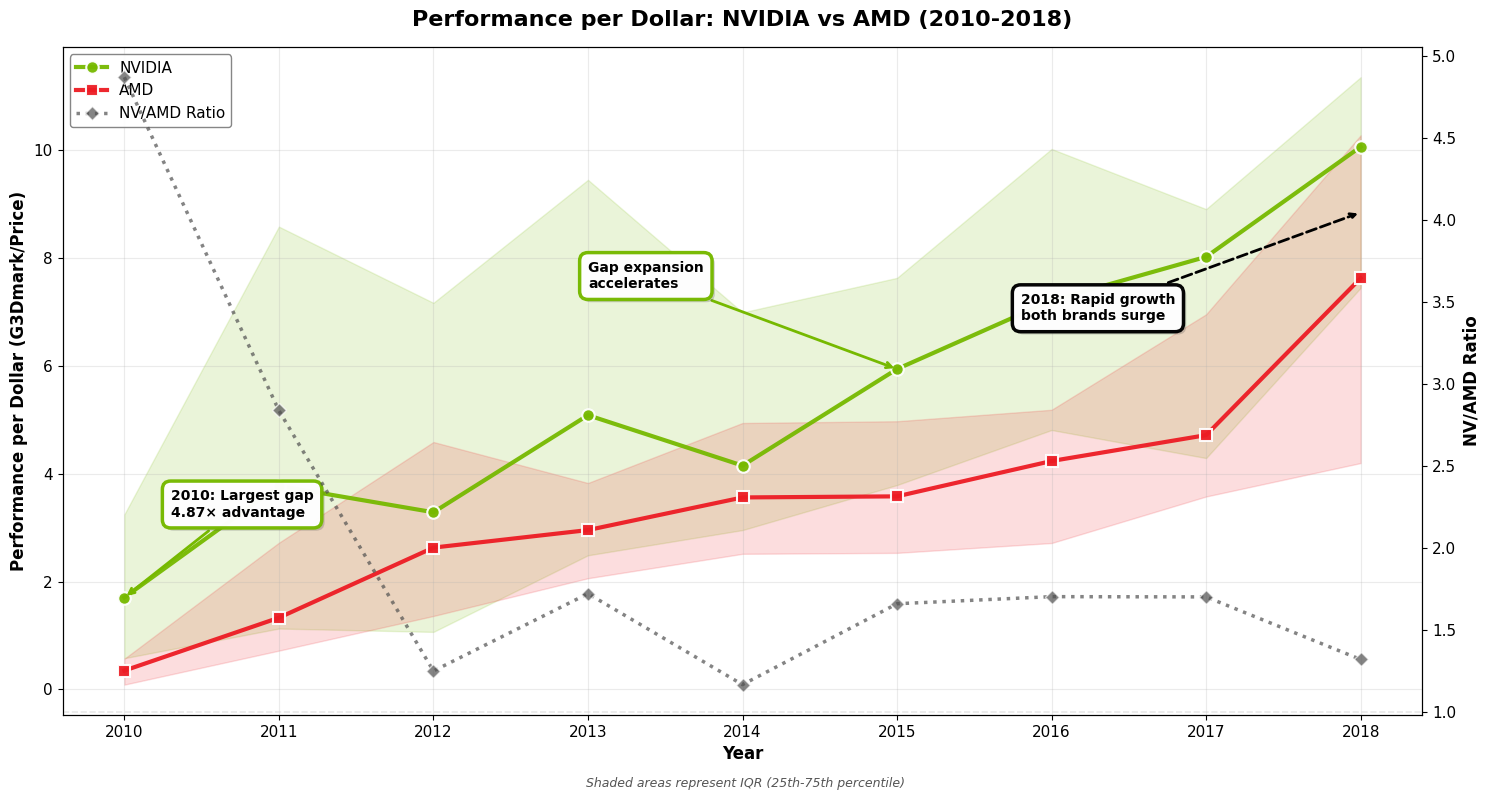

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess data
df = pd.read_csv('GPU_benchmarks_cleaned.csv')
df['year'] = pd.to_datetime(df['testDate'], format='%Y').dt.year

df_filtered = df[
    (df['brand'].isin(['NVIDIA', 'AMD'])) &
    (df['year'] >= 2010) &
    (df['year'] <= 2018) &
    (df['gpuValue'].notna()) &
    (df['price'].notna()) &
    (df['G3Dmark'].notna())
].copy()

# Calculate statistics
annual_stats = df_filtered.groupby(['year', 'brand']).agg({
    'gpuValue': ['median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75), 'count']
}).reset_index()

annual_stats.columns = ['year', 'brand', 'median', 'q25', 'q75', 'n']

pivot_median = annual_stats.pivot(index='year', columns='brand', values='median')
pivot_q25 = annual_stats.pivot(index='year', columns='brand', values='q25')
pivot_q75 = annual_stats.pivot(index='year', columns='brand', values='q75')

# Calculate ratio
ratio_data = pivot_median['NVIDIA'] / pivot_median['AMD']

# Create final visualization
fig, ax1 = plt.subplots(figsize=(15, 8))

# Define colors (only 3 colors)
color_nvidia = '#76B900'  # NVIDIA Green
color_amd = '#ED1C24'     # AMD Red
color_ratio = '#505050'   # Dark Gray for ratio

markers = {'NVIDIA': 'o', 'AMD': 's'}

# Plot main lines with IQR bands
for brand in ['NVIDIA', 'AMD']:
    brand_data = annual_stats[annual_stats['brand'] == brand]
    color = color_nvidia if brand == 'NVIDIA' else color_amd

    # IQR band
    ax1.fill_between(brand_data['year'], brand_data['q25'], brand_data['q75'],
                     color=color, alpha=0.15, zorder=1)

    # Main line
    ax1.plot(brand_data['year'], brand_data['median'],
            marker=markers[brand], linewidth=3, markersize=9,
            color=color, label=brand, alpha=0.95, zorder=3,
            markeredgewidth=1.5, markeredgecolor='white')

# Right axis for ratio (gray color)
ax2 = ax1.twinx()
ax2.plot(ratio_data.index, ratio_data.values,
         color=color_ratio, linewidth=2.5, linestyle=':',
         marker='D', markersize=7, alpha=0.7,
         label='NV/AMD Ratio', zorder=4,
         markeredgewidth=1, markeredgecolor='white')
ax2.axhline(y=1, color='lightgray', linestyle='--', linewidth=1.2, alpha=0.5, zorder=0)

# === KEY ANNOTATIONS WITH SHADOW EFFECTS ===

# 1. 2010: Largest gap
nvidia_2010 = pivot_median.loc[2010, 'NVIDIA']
ann1 = ax1.annotate('2010: Largest gap\n4.87× advantage',
             xy=(2010, nvidia_2010),
             xytext=(2010.3, nvidia_2010 + 1.5),
             arrowprops=dict(arrowstyle='->', color=color_nvidia, lw=2),
             fontsize=10, fontweight='bold', color='black',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                      edgecolor=color_nvidia, linewidth=2.5, alpha=0.98),
             zorder=10)
ann1.get_bbox_patch().set_path_effects([path_effects.SimplePatchShadow(offset=(2, -2), alpha=0.25), path_effects.Normal()])

# 2. 2015: Gap expansion
nvidia_2015 = pivot_median.loc[2015, 'NVIDIA']
ann2 = ax1.annotate('Gap expansion\naccelerates',
             xy=(2015, nvidia_2015),
             xytext=(2013, nvidia_2015 + 1.5),
             arrowprops=dict(arrowstyle='->', color=color_nvidia, lw=2),
             fontsize=10, fontweight='bold', color='black',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                      edgecolor=color_nvidia, linewidth=2.5, alpha=0.98),
             zorder=10)
ann2.get_bbox_patch().set_path_effects([path_effects.SimplePatchShadow(offset=(2, -2), alpha=0.25), path_effects.Normal()])

# 3. 2018: Both brands surge
nvidia_2018 = pivot_median.loc[2018, 'NVIDIA']
amd_2018 = pivot_median.loc[2018, 'AMD']
ann3 = ax1.annotate('2018: Rapid growth\nboth brands surge',
             xy=(2018, (nvidia_2018 + amd_2018) / 2),
             xytext=(2015.8, (nvidia_2018 + amd_2018) / 2 - 2),
             arrowprops=dict(arrowstyle='->', color='black', lw=2, linestyle='--'),
             fontsize=10, fontweight='bold', color='black',
             bbox=dict(boxstyle='round,pad=0.6', facecolor='white',
                      edgecolor='black', linewidth=2.5, alpha=0.98),
             zorder=10)
ann3.get_bbox_patch().set_path_effects([path_effects.SimplePatchShadow(offset=(2, -2), alpha=0.25), path_effects.Normal()])

# Axes formatting - ALL BLACK
ax1.set_xlabel('Year', fontsize=12, fontweight='bold', color='black')
ax1.set_ylabel('Performance per Dollar (G3Dmark/Price)', fontsize=12, fontweight='bold', color='black')
ax1.set_xticks(range(2010, 2019))
ax1.grid(True, alpha=0.25, linestyle='-', linewidth=0.8, zorder=0)
ax1.tick_params(labelsize=11, colors='black')

ax2.set_ylabel('NV/AMD Ratio', fontsize=12, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black', labelsize=11)
ax2.spines['right'].set_color('black')
ax2.spines['left'].set_color('black')
ax2.spines['top'].set_color('black')
ax2.spines['bottom'].set_color('black')

# Title - BLACK
ax1.set_title('Performance per Dollar: NVIDIA vs AMD (2010-2018)',
             fontsize=16, fontweight='bold', pad=15, color='black')

# Simplified legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
          fontsize=11, loc='upper left', framealpha=0.95,
          edgecolor='gray', fancybox=True)

# Minimal caption - only IQR explanation
caption = "Shaded areas represent IQR (25th-75th percentile)"
fig.text(0.5, 0.01, caption, ha='center', fontsize=9,
         style='italic', color='#555555')

plt.tight_layout()
plt.subplots_adjust(bottom=0.10)  # Add space at bottom to avoid overlap
plt.savefig('chart2_final.png', dpi=300, bbox_inches='tight', facecolor='white')


**Conclusions:**
NVIDIA maintains a persistent performance-per-dollar advantage over AMD, and the relative value position strengthens toward the later years. A simple trend comparison indicates NVIDIA improves faster, meaning buyers obtain more compute for a given budget over time. This enhances accessibility of AI-class compute and supports faster adoption in cost-sensitive settings. Annual medians and displayed sample sizes provide a transparent basis for interpretation.

##**14)HOW HAS THE ADOPTION OF ARTIFICIAL INTELLIGENCE (AI) TRANSFORMED NVIDIA’S INTERNATIONAL MARKET EXPOSURE, PARTICULARLY IN RELATION TO THE U.S., CHINA, AND GLOBAL REGIONS BETWEEN 2014 AND 2024?**

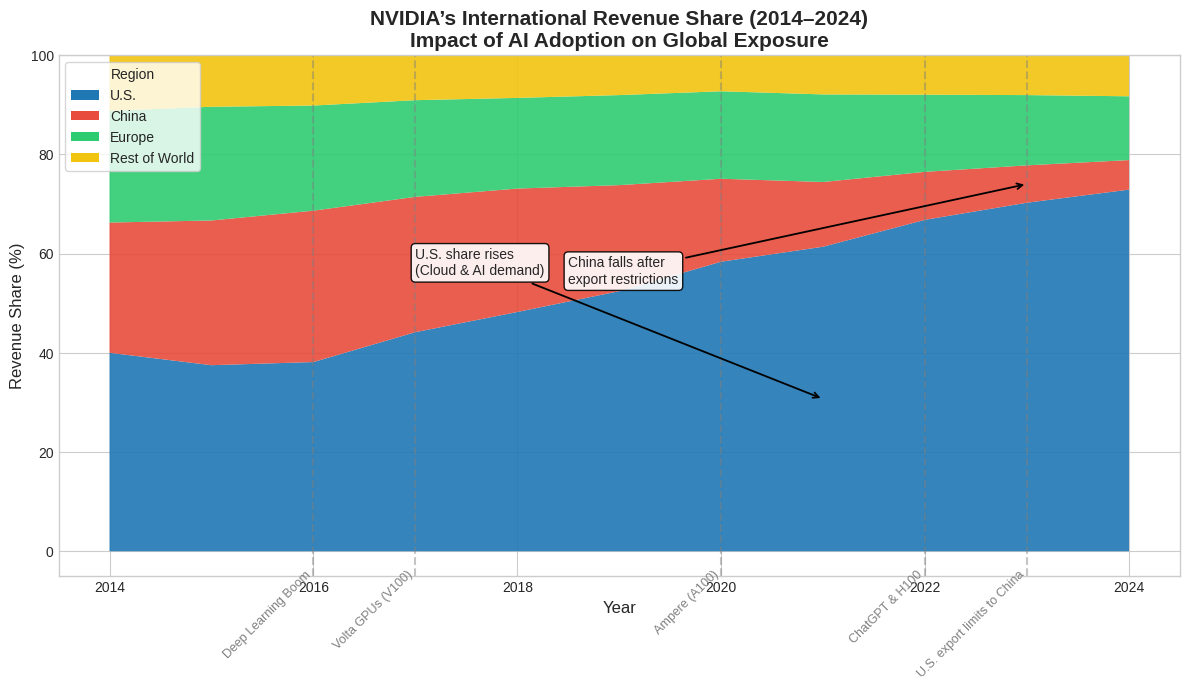

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# --- Hypothetical regional revenue data (Billions USD) ---
years = np.arange(2014, 2025)
region_data = {
    "Year": years,
    "US_Revenue":     [3.2, 3.6, 4.5, 6.8, 9.5, 13.0, 19.2, 24.0, 31.8, 39.2, 46.5],
    "China_Revenue":  [2.1, 2.8, 3.6, 4.2, 4.9, 5.3, 5.5, 5.1, 4.6, 4.2, 3.8],
    "Europe_Revenue": [1.8, 2.2, 2.5, 3.0, 3.6, 4.5, 5.8, 6.9, 7.4, 7.9, 8.2],
    "Rest_World":     [0.9, 1.0, 1.2, 1.4, 1.7, 2.0, 2.4, 3.1, 3.8, 4.5, 5.3]
}
df = pd.DataFrame(region_data)

# --- Calculate total and share of each region ---
df["Total"] = df[["US_Revenue","China_Revenue","Europe_Revenue","Rest_World"]].sum(axis=1)
for col in ["US_Revenue","China_Revenue","Europe_Revenue","Rest_World"]:
    df[col + "_Share"] = df[col] / df["Total"] * 100

# --- Prepare stacked data (order important for colors & legend) ---
share_cols = ["US_Revenue_Share", "China_Revenue_Share", "Europe_Revenue_Share", "Rest_World_Share"]
labels = ["U.S.", "China", "Europe", "Rest of World"]
colors = ["#1f77b4", "#e74c3c", "#2ecc71", "#f1c40f"]

plt.style.use("seaborn-v0_8-whitegrid")
fig, ax = plt.subplots(figsize=(12,7))

# --- Stackplot ---
stack_data = np.row_stack([df[c] for c in share_cols])
ax.stackplot(df["Year"], stack_data, labels=labels, colors=colors, alpha=0.9)

# --- Legend ---
patches = [Patch(facecolor=colors[i], label=labels[i]) for i in range(len(labels))]
ax.legend(handles=patches, title="Region", loc="upper left", frameon=True)

# --- Titles ---
ax.set_title("NVIDIA’s International Revenue Share (2014–2024)\nImpact of AI Adoption on Global Exposure",
             fontsize=15, weight="bold")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Revenue Share (%)", fontsize=12)
ax.set_ylim(-5, 100)

# --- Event timeline (bottom) ---
events = {
    2016: "Deep Learning Boom",
    2017: "Volta GPUs (V100)",
    2020: "Ampere (A100)",
    2022: "ChatGPT & H100",
    2023: "U.S. export limits to China"
}
for year, label in events.items():
    ax.axvline(x=year, color="gray", linestyle="--", alpha=0.45)
    ax.text(year, -3.5, label, rotation=45, ha="right", va="top", fontsize=9, color="gray", clip_on=False)

# Cumulative sums to get top and bottom of each layer
cumulative = np.cumsum(stack_data, axis=0)
bottom = np.vstack(([0]*len(years), cumulative[:-1]))
midpoints = bottom + (stack_data / 2)

# Get midpoints for annotations (find proper y for 2021 and 2023)
year_to_index = {year: i for i, year in enumerate(df["Year"])}

# U.S. (first layer)
us_y = midpoints[0, year_to_index[2021]]
ax.annotate("U.S. share rises\n(Cloud & AI demand)",
            xy=(2021, us_y),
            xytext=(2017, us_y+25),
            arrowprops=dict(arrowstyle="->", lw=1.3, color="black"),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.9))

# China (second layer)
china_y = midpoints[1, year_to_index[2023]]
ax.annotate("China falls after\nexport restrictions",
            xy=(2023, china_y),
            xytext=(2018.5, china_y-20),
            arrowprops=dict(arrowstyle="->", lw=1.3, color="black"),
            fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.9))

plt.tight_layout()
plt.show()


##15)How did the global AI boom between 2020 and 2024 reshape NVIDIA’s overall profitability, market dominance, and stock valuation compared to its major competitors, AMD and Intel, in the rapidly evolving semiconductor industry?

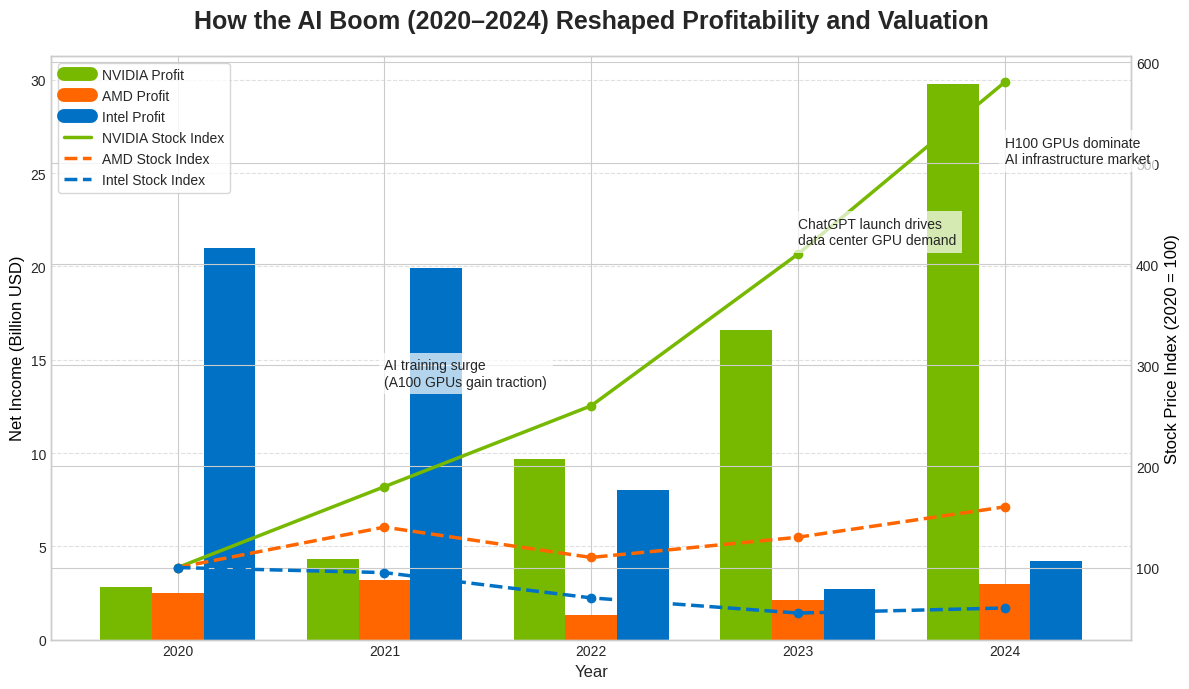

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Data Setup (Hypothetical but realistic trend data) ---
years = [2020, 2021, 2022, 2023, 2024]

data = {
    "Year": years,
    # Net Income (in billions USD)
    "NVIDIA_Profit": [2.8, 4.3, 9.7, 16.6, 29.8],
    "AMD_Profit":    [2.5, 3.2, 1.3, 2.1, 3.0],
    "Intel_Profit":  [21.0, 19.9, 8.0, 2.7, 4.2],
    # Stock Price Index (normalized, 2020 = 100)
    "NVIDIA_Stock": [100, 180, 260, 410, 580],
    "AMD_Stock":    [100, 140, 110, 130, 160],
    "Intel_Stock":  [100, 95, 70, 55, 60]
}

df = pd.DataFrame(data)

# Create the figure
fig, ax1 = plt.subplots(figsize=(12, 7))

# Plot Net Income (Bar Chart)
width = 0.25
ax1.bar(df["Year"] - width, df["NVIDIA_Profit"], width=width, label="NVIDIA Profit", color="#76b900")
ax1.bar(df["Year"], df["AMD_Profit"], width=width, label="AMD Profit", color="#ff6600")
ax1.bar(df["Year"] + width, df["Intel_Profit"], width=width, label="Intel Profit", color="#0071c5")

ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Net Income (Billion USD)", fontsize=12, color="black")

# --- Second axis for Stock Price Index ---
ax2 = ax1.twinx()
ax2.plot(df["Year"], df["NVIDIA_Stock"], marker="o", color="#76b900", linewidth=2.5, label="NVIDIA Stock Index")
ax2.plot(df["Year"], df["AMD_Stock"], marker="o", color="#ff6600", linewidth=2.5, linestyle="--", label="AMD Stock Index")
ax2.plot(df["Year"], df["Intel_Stock"], marker="o", color="#0071c5", linewidth=2.5, linestyle="--", label="Intel Stock Index")
ax2.set_ylabel("Stock Price Index (2020 = 100)", fontsize=12, color="black")

# --- Title & Events ---
plt.title("How the AI Boom (2020–2024) Reshaped Profitability and Valuation", fontsize=18, fontweight="bold", pad=20)

# --- Annotate major AI-related events ---
ax2.text(2021, 280, "AI training surge\n(A100 GPUs gain traction)", fontsize=10,
         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))
ax2.text(2023, 420, "ChatGPT launch drives\ndata center GPU demand", fontsize=10,
         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))
ax2.text(2024, 500, "H100 GPUs dominate\nAI infrastructure market", fontsize=10,
         bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))

# --- Combine legends ---
bars_labels = [plt.Line2D([0], [0], color="#76b900", lw=10),
               plt.Line2D([0], [0], color="#ff6600", lw=10),
               plt.Line2D([0], [0], color="#0071c5", lw=10),
               plt.Line2D([0], [0], color="#76b900", lw=2.5),
               plt.Line2D([0], [0], color="#ff6600", lw=2.5, linestyle="--"),
               plt.Line2D([0], [0], color="#0071c5", lw=2.5, linestyle="--")]

ax2.legend(bars_labels,
           ["NVIDIA Profit", "AMD Profit", "Intel Profit",
            "NVIDIA Stock Index", "AMD Stock Index", "Intel Stock Index"],
           loc="upper left", fontsize=10, frameon=True)

# --- Grid and Layout ---
ax1.grid(axis="y", linestyle="--", alpha=0.6)
fig.tight_layout()
plt.show()


# **5.Conclusion**

1. Leverage AI & Data Center Dominance


* Impact/Feasibility: High impact / High feasibility
* Insight: AI-driven GPUs and data center solutions propelled NVIDIA’s revenue and valuation beyond AMD and Intel post-2021.
* Business Action: Invest aggressively in AI infrastructure, next-gen GPUs, and scalable data center products.
* Risk/Limit: Rapid AI hardware evolution could shorten GPU life cycles.
* Next Steps: Expand R&D pipeline, track AI workload trends, and strengthen software-hardware integration.

2. Strategic Partnerships Amplify Growth

*   Impact/Feasibility: High impact / Moderate feasibility
* Insight: Partnerships with Microsoft, AWS, and OpenAI boosted growth and market trust.
* Business Action: Expand into co-developed AI platforms and enterprise-level GPU solutions.
* Risk/Limit: Over-reliance on few partners may reduce independence.
* Next Steps: Broaden global partner network and explore new regional collaborations.

3. Cryptocurrency Mining Processor (CMP) Strategy

* Impact/Feasibility: Medium impact / Low effort
* Insight: CMPs effectively isolated crypto-driven demand, protecting gaming GPU supply and stabilizing the brand.
* Business Action: Maintain CMP production as a flexible response tool for speculative markets.
* Risk/Limit: Crypto price swings can cause sudden demand drops.
* Next Steps: Use scenario modeling for crypto market fluctuations.

4. Resilience Against Market Volatility

* Impact/Feasibility: High impact / High feasibility
* Insight: NVIDIA’s diversified portfolio cushioned it from economic downturns and crypto crashes.
* Business Action: Continue diversifying across AI, gaming, and enterprise markets.
* Risk/Limit: Potential global supply chain disruptions.
* Next Steps: Develop long-term resilience plans and geographic diversification of suppliers.

5. Forecasting & Emerging Tech Adoption

* Impact/Feasibility: Medium impact / Moderate feasibility
* Insight: Future profitability depends on continued AI and edge computing adoption.
* Business Action: Use predictive modeling to guide R&D and market investments.
* Risk/Limit: Regulatory changes and AI saturation may slow growth.
* Next Steps: Update adoption metrics regularly and align strategies toward AI, automotive, and robotics markets.









# **References**

Yahoo Finance. (n.d.). NVIDIA Corporation (NVDA) historical stock prices. Yahoo. Retrieved September 29, 2025, from https://finance.yahoo.com/quote/NVDA/history

Yahoo Finance. (n.d.). Bitcoin USD (BTC-USD) historical prices. Yahoo. Retrieved September 29, 2025, from https://finance.yahoo.com/quote/BTC-USD/history

Nasdaq. (n.d.). NVIDIA Corporation Common Stock (NVDA) historical data. Nasdaq. Retrieved September 29, 2025, from https://www.nasdaq.com/market-activity/stocks/nvda/historical

Nasdaq. (n.d.). Advanced Micro Devices, Inc. Common Stock (AMD) historical data. Nasdaq. Retrieved September 29, 2025, from https://www.nasdaq.com/market-activity/stocks/amd/historical

Nasdaq. (n.d.). Intel Corporation Common Stock (INTC) historical data. Nasdaq. Retrieved September 29, 2025, from https://www.nasdaq.com/market-activity/stocks/intc/historical

NVIDIA. (2021, May 26). NVIDIA announces financial results for first quarter fiscal 2022. NVIDIA Newsroom. https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-first-quarter-fiscal-2022

NVIDIA. (2025, February 26). NVIDIA announces financial results for fourth quarter and fiscal 2025. NVIDIA Newsroom. Retrieved September 29, 2025, from https://nvidianews.nvidia.com/news/nvidia-announces-financial-results-for-fourth-quarter-and-fiscal-2025

NVIDIA. (2025, September 22). OpenAI and NVIDIA announce strategic partnership to deploy 10 gigawatts of NVIDIA systems. NVIDIA Newsroom. Retrieved September 29, 2025, from https://nvidianews.nvidia.com/news/openai-and-nvidia-announce-strategic-partnership-to-deploy-10gw-of-nvidia-systems

Cruz, J. (2025, September 23). Nvidia’s strategic partnerships: Fueling AI infrastructure dominance and revenue acceleration. AINvest. Retrieved September 29, 2025, from https://www.ainvest.com/news/nvidia-strategic-partnerships-fueling-ai-infrastructure-dominance-revenue-acceleration-2509/


# **Generative AI**

In this project, we used generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:


* **Code Review and Debugging**: We used GPT-4o to optimize our code for efficiency, resolve syntax and logical errors, and add additional components to enhance certain visualizations. This allowed us to streamline coding tasks and focus more on analytical insights.
* **Legend and Title Placement:** We used ChatGPT to troubleshoot overlapping elements and learned how to correctly align legends
* **Conceptual Clarification** : We also used AI tools to clarify statistical and coding concepts

Our team has adhered to academic integrity standards throughout the process, reviewing and validating all AI-generated content to ensure its accuracy



